# Base Paper Implementation

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

## Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)
# df = df.drop(columns = ['Unnamed: 0'])

In [3]:
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [4]:
x = df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [5]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,2020-03-10,1.0,0.0,1
1,2020-03-10,2.0,0.0,2
2,2020-03-10,0.0,0.0,0
3,2020-03-10,0.0,0.0,0
4,2020-03-10,0.0,0.0,0


## Data Preparation For Model Implementation

In [6]:
# dates = np.array(x['Date'])
# dates = [datetime.strptime(date, '%y%y%y%y-%m-%d').date() for date in dates] 
# dates = [x.strftime('%d/%m/%y') for x in dates]
# dates
x['Date'] = pd.to_datetime(x['Date'])
x.sort_values('Date')
x['Date'] = x['Date'].dt.strftime('%d/%m/%y')

In [7]:
x.head(7)

,Date,Confirmed,Deaths,Recovered
0,10/03/20,1.0,0.0,1
1,10/03/20,2.0,0.0,2
2,10/03/20,0.0,0.0,0
3,10/03/20,0.0,0.0,0
4,10/03/20,0.0,0.0,0
5,10/03/20,0.0,0.0,0
6,10/03/20,2.0,0.0,2


In [8]:
dates = list(x['Date'].unique())

In [9]:
x = x.groupby(by=["Date"]).sum()

In [10]:
x.head()

,Confirmed,Deaths,Recovered
Date,,,
01/01/21,482178.0,10176.0,437229
01/01/22,1295933.0,28933.0,1191105
01/02/21,546428.0,11683.0,501252
01/02/22,1430366.0,29301.0,1314639
01/03/21,581365.0,12896.0,546371


## Ploting Imported Data

In [11]:
dates2020 = []
dates2021 = []
dates2022 = []

for date in dates:
    if(date[-2:] == '20'):
        dates2020.append(date)
    elif(date[-2:] == '21'):
        dates2021.append(date)
    elif(date[-2:] == '22'):
        dates2022.append(date)

In [12]:
dates2020.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2021.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2022.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [13]:
confirmed_pk2020 = []
confirmed_pk2021 = []
confirmed_pk2022 = []

deaths_pk2020 = []
deaths_pk2021 = []
deaths_pk2022 = []

recovered_pk2020 = []
recovered_pk2021 = []
recovered_pk2022 = []

for date in dates2020:
    confirmed_pk2020.append(x['Confirmed'][date])
    deaths_pk2020.append(x['Deaths'][date])
    recovered_pk2020.append(x['Recovered'][date])
    
for date in dates2021:
    confirmed_pk2021.append(x['Confirmed'][date])
    deaths_pk2021.append(x['Deaths'][date])
    recovered_pk2021.append(x['Recovered'][date])
    
for date in dates2022:
    confirmed_pk2022.append(x['Confirmed'][date])
    deaths_pk2022.append(x['Deaths'][date])
    recovered_pk2022.append(x['Recovered'][date])

## Year 2020

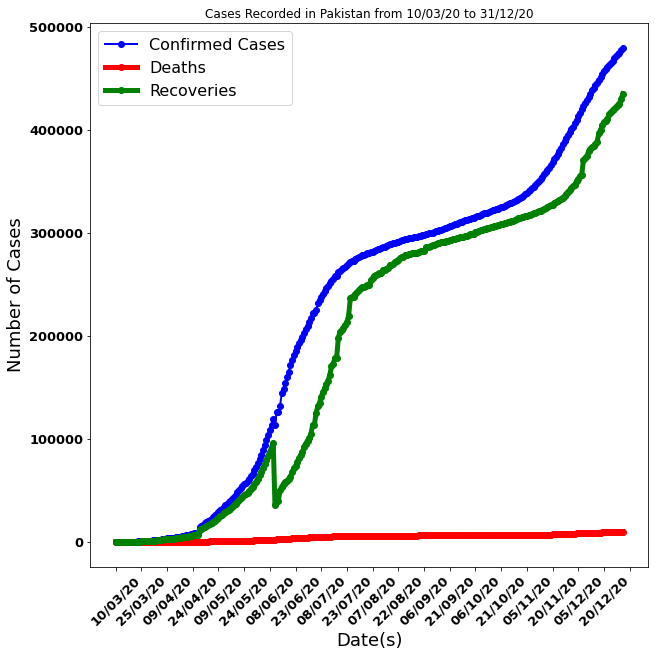

In [14]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2020,confirmed_pk2020, 'bo-', linewidth = 2)
plt.plot(dates2020,deaths_pk2020, 'ro-', linewidth = 5)
plt.plot(dates2020,recovered_pk2020, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2020[0] + ' to ' + dates2020[-1])
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

## Year 2021

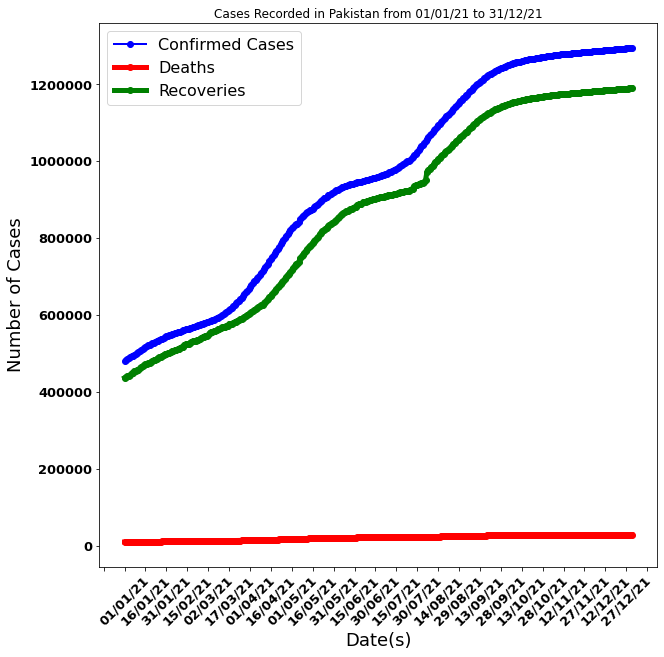

In [15]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2021,confirmed_pk2021, 'bo-', linewidth = 2)
plt.plot(dates2021,deaths_pk2021, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2021,recovered_pk2021, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2021[0] + ' to ' + dates2021[-1])
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Year 2022

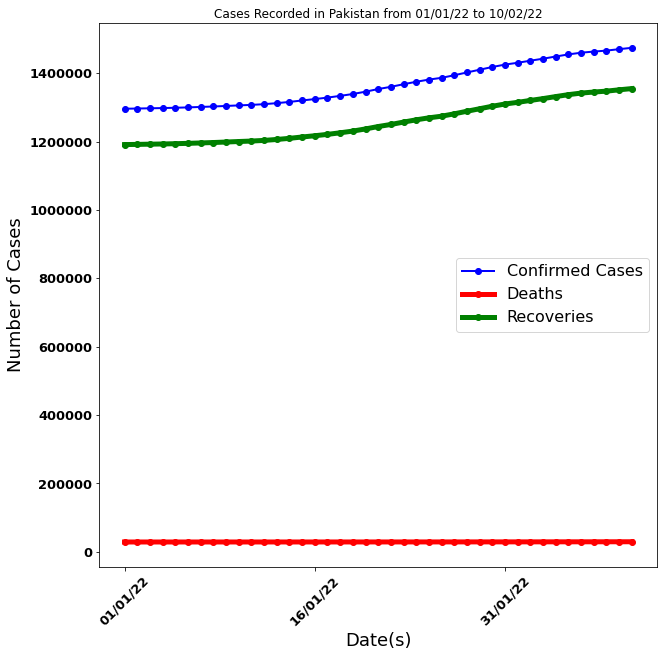

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2022,confirmed_pk2022, 'bo-', linewidth = 2)
plt.plot(dates2022,deaths_pk2022, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2022,recovered_pk2022, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2022[0] + ' to ' + dates2022[-1])
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Combined Visualization

In [17]:
dates.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [18]:
confirmed_pk = []
deaths_pk = []
recovered_pk = []

for date in dates:
    confirmed_pk.append(x['Confirmed'][date])
    deaths_pk.append(x['Deaths'][date])
    recovered_pk.append(x['Recovered'][date])

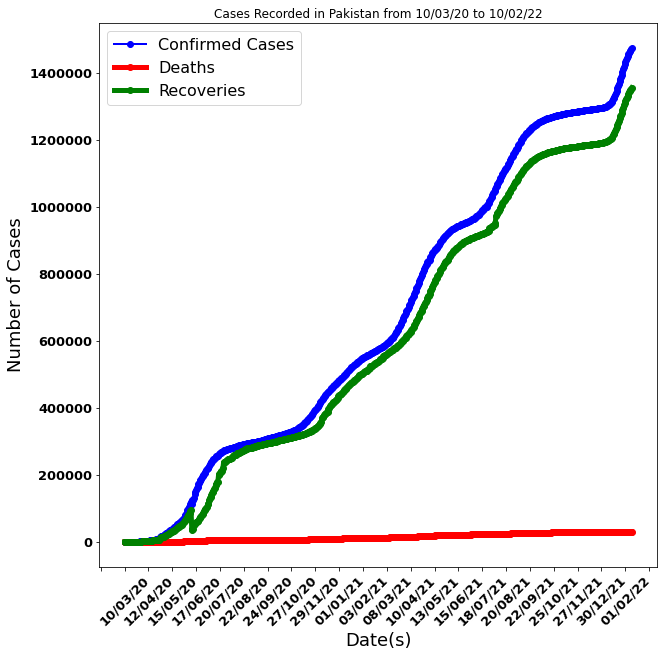

In [19]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=33.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates,confirmed_pk, 'bo-', linewidth = 2)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Data Preprocessing

### Processing input data into polynomial form data

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_reg = PolynomialFeatures(degree = 6)

In [22]:
input_data_simple = np.arange(0,len(x)) + 1

### Data transformed into polynomial equation upto degree mentioned above

In [23]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

### Preparing Input and Dates into DataFrame

In [24]:
inputData_dates = pd.Series(dates, index = input_data_simple)

### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

## Creating Neural Network

<h4>Neural Network Design</h4>
<p>We designed a neural network with <b>one input layer, one hidden layer (with 200 neurons)</b> with <b>rectifying linear activation function</b> and <b>one output layer</b>.</p>

<h4>Optimization/Training</h4>
<p><b>Adam</b> optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. The loss function is used as mean square error between predictions and observations.</p>

In [27]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

## Predictions on All the Cases (Confirmed, Deaths, Recovories) with Designed ANN

<p>This section has been divided into following two subsections:</p>
<ul>
    <li>In first section, the data has splitted into train/test to evaluate the model and named as <b>ann_model_for_evaluation</b>. The purpose of this section is to evaluate the performance and accuracy of model with available data. For this purpose, training data is used to train and fit the model on data and then test data is used to check the efficiency and accuracy of model.</li>
    <li>In second section, once the model has evaluated, whole data is used to train the model and then some future input data is generated to predict the cases in future.</li>
</ul>

## 1 - Evaluating Model on Train Test Splitted Data

#### Splitting data into train-test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
confirmed_pk = np.array(confirmed_pk)
deaths_pk = np.array(deaths_pk)
recovered_pk = np.array(recovered_pk)

In [30]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [31]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

#### Transforming into tensors of input-output data for ANN

In [32]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

#### Creating instance of proposed ANN model

In [33]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

#### A model summary about layers shapes and number of paramaters/weights is given below

In [34]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


#### Selection of best epochs (during experiments) and training/fitting of proposed ANN model on training data

In [35]:
best_epochs = 4000

In [36]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Epoch 1/4000
21/21 [==============================] - 1s 4ms/step - loss: 356009017344.0000 - mean_absolute_error: 404656.9688
Epoch 2/4000
21/21 [==============================] - 0s 2ms/step - loss: 351469666304.0000 - mean_absolute_error: 400679.7500
Epoch 3/4000
21/21 [==============================] - 0s 2ms/step - loss: 339368706048.0000 - mean_absolute_error: 392647.6250
Epoch 4/4000
21/21 [==============================] - 0s 2ms/step - loss: 318620467200.0000 - mean_absolute_error: 380240.5312
Epoch 5/4000
21/21 [==============================] - 0s 2ms/step - loss: 290451947520.0000 - mean_absolute_error: 363420.4375
Epoch 6/4000
21/21 [==============================] - 0s 2ms/step - loss: 257093861376.0000 - mean_absolute_error: 343085.2500
Epoch 7/4000
21/21 [==============================] - 0s 2ms/step - loss: 220419112960.0000 - mean_absolute_error: 319235.5625
Epoch 8/4000
21/21 [==============================] - 0s 2ms/step - loss: 185027936256.0000 - mean_absolute_err

21/21 [==============================] - 0s 1ms/step - loss: 615193408.0000 - mean_absolute_error: 16700.8164
Epoch 66/4000
21/21 [==============================] - 0s 2ms/step - loss: 611709824.0000 - mean_absolute_error: 16701.7461
Epoch 67/4000
21/21 [==============================] - 0s 643us/step - loss: 611515712.0000 - mean_absolute_error: 16575.2305
Epoch 68/4000
21/21 [==============================] - 0s 1ms/step - loss: 610000512.0000 - mean_absolute_error: 16377.7852
Epoch 69/4000
21/21 [==============================] - 0s 3ms/step - loss: 606027456.0000 - mean_absolute_error: 16729.9805
Epoch 70/4000
21/21 [==============================] - 0s 2ms/step - loss: 601570112.0000 - mean_absolute_error: 16378.6416
Epoch 71/4000
21/21 [==============================] - 0s 2ms/step - loss: 600523904.0000 - mean_absolute_error: 16340.9746
Epoch 72/4000
21/21 [==============================] - 0s 2ms/step - loss: 600420672.0000 - mean_absolute_error: 16503.5352
Epoch 73/4000
21/21 

21/21 [==============================] - 0s 813us/step - loss: 541527488.0000 - mean_absolute_error: 15051.9668
Epoch 131/4000
21/21 [==============================] - 0s 1ms/step - loss: 540413888.0000 - mean_absolute_error: 15014.4980
Epoch 132/4000
21/21 [==============================] - 0s 2ms/step - loss: 541545664.0000 - mean_absolute_error: 15102.2041
Epoch 133/4000
21/21 [==============================] - 0s 1ms/step - loss: 541631680.0000 - mean_absolute_error: 15047.4170
Epoch 134/4000
21/21 [==============================] - 0s 990us/step - loss: 539872640.0000 - mean_absolute_error: 15011.3701
Epoch 135/4000
21/21 [==============================] - 0s 1ms/step - loss: 541595008.0000 - mean_absolute_error: 15015.5176
Epoch 136/4000
21/21 [==============================] - 0s 2ms/step - loss: 540991360.0000 - mean_absolute_error: 15051.9609
Epoch 137/4000
21/21 [==============================] - 0s 1ms/step - loss: 538978304.0000 - mean_absolute_error: 14943.4082
Epoch 138/4

21/21 [==============================] - 0s 1ms/step - loss: 531329472.0000 - mean_absolute_error: 14805.2568
Epoch 196/4000
21/21 [==============================] - 0s 2ms/step - loss: 532296448.0000 - mean_absolute_error: 14785.0820
Epoch 197/4000
21/21 [==============================] - 0s 1ms/step - loss: 534371552.0000 - mean_absolute_error: 15005.8115
Epoch 198/4000
21/21 [==============================] - 0s 1ms/step - loss: 530103008.0000 - mean_absolute_error: 14977.2217
Epoch 199/4000
21/21 [==============================] - 0s 2ms/step - loss: 534749280.0000 - mean_absolute_error: 14897.9072
Epoch 200/4000
21/21 [==============================] - 0s 2ms/step - loss: 532611008.0000 - mean_absolute_error: 14785.0059
Epoch 201/4000
21/21 [==============================] - 0s 2ms/step - loss: 531527680.0000 - mean_absolute_error: 14860.9336
Epoch 202/4000
21/21 [==============================] - 0s 1ms/step - loss: 529249184.0000 - mean_absolute_error: 14815.3760
Epoch 203/4000


21/21 [==============================] - 0s 1ms/step - loss: 525177152.0000 - mean_absolute_error: 14906.1309
Epoch 261/4000
21/21 [==============================] - 0s 2ms/step - loss: 520714368.0000 - mean_absolute_error: 14717.0664
Epoch 262/4000
21/21 [==============================] - 0s 2ms/step - loss: 520926592.0000 - mean_absolute_error: 14767.9854
Epoch 263/4000
21/21 [==============================] - 0s 2ms/step - loss: 521997984.0000 - mean_absolute_error: 14896.7510
Epoch 264/4000
21/21 [==============================] - 0s 2ms/step - loss: 523459072.0000 - mean_absolute_error: 14765.4541
Epoch 265/4000
21/21 [==============================] - 0s 2ms/step - loss: 521020224.0000 - mean_absolute_error: 14825.9492
Epoch 266/4000
21/21 [==============================] - 0s 2ms/step - loss: 526763040.0000 - mean_absolute_error: 14927.5801
Epoch 267/4000
21/21 [==============================] - 0s 2ms/step - loss: 534310432.0000 - mean_absolute_error: 14928.3760
Epoch 268/4000


21/21 [==============================] - 0s 1ms/step - loss: 505810336.0000 - mean_absolute_error: 14422.9688
Epoch 326/4000
21/21 [==============================] - 0s 2ms/step - loss: 504514144.0000 - mean_absolute_error: 14518.3867
Epoch 327/4000
21/21 [==============================] - 0s 4ms/step - loss: 505326784.0000 - mean_absolute_error: 14647.0537
Epoch 328/4000
21/21 [==============================] - 0s 3ms/step - loss: 505788864.0000 - mean_absolute_error: 14377.5342
Epoch 329/4000
21/21 [==============================] - 0s 4ms/step - loss: 513117600.0000 - mean_absolute_error: 14906.2500
Epoch 330/4000
21/21 [==============================] - 0s 2ms/step - loss: 504599776.0000 - mean_absolute_error: 14524.9922
Epoch 331/4000
21/21 [==============================] - 0s 2ms/step - loss: 505731840.0000 - mean_absolute_error: 14631.1045
Epoch 332/4000
21/21 [==============================] - 0s 2ms/step - loss: 503483136.0000 - mean_absolute_error: 14523.5469
Epoch 333/4000


21/21 [==============================] - 0s 2ms/step - loss: 487835680.0000 - mean_absolute_error: 14264.4053
Epoch 391/4000
21/21 [==============================] - 0s 2ms/step - loss: 489234304.0000 - mean_absolute_error: 14278.0117
Epoch 392/4000
21/21 [==============================] - 0s 2ms/step - loss: 490445536.0000 - mean_absolute_error: 14251.3447
Epoch 393/4000
21/21 [==============================] - 0s 2ms/step - loss: 490816192.0000 - mean_absolute_error: 14352.5186
Epoch 394/4000
21/21 [==============================] - 0s 2ms/step - loss: 484008704.0000 - mean_absolute_error: 14080.1455
Epoch 395/4000
21/21 [==============================] - 0s 2ms/step - loss: 485007520.0000 - mean_absolute_error: 14185.3438
Epoch 396/4000
21/21 [==============================] - 0s 3ms/step - loss: 488985408.0000 - mean_absolute_error: 14124.2432
Epoch 397/4000
21/21 [==============================] - 0s 2ms/step - loss: 487550208.0000 - mean_absolute_error: 14284.8232
Epoch 398/4000


21/21 [==============================] - 0s 2ms/step - loss: 483701824.0000 - mean_absolute_error: 14168.2012
Epoch 456/4000
21/21 [==============================] - 0s 2ms/step - loss: 480283872.0000 - mean_absolute_error: 14104.1348
Epoch 457/4000
21/21 [==============================] - 0s 2ms/step - loss: 477674560.0000 - mean_absolute_error: 14065.8965
Epoch 458/4000
21/21 [==============================] - 0s 2ms/step - loss: 476182272.0000 - mean_absolute_error: 14061.9561
Epoch 459/4000
21/21 [==============================] - 0s 2ms/step - loss: 477075936.0000 - mean_absolute_error: 14070.5400
Epoch 460/4000
21/21 [==============================] - 0s 2ms/step - loss: 476589184.0000 - mean_absolute_error: 13931.5723
Epoch 461/4000
21/21 [==============================] - 0s 2ms/step - loss: 475648288.0000 - mean_absolute_error: 14073.9971
Epoch 462/4000
21/21 [==============================] - 0s 2ms/step - loss: 474700768.0000 - mean_absolute_error: 14052.9854
Epoch 463/4000


21/21 [==============================] - 0s 2ms/step - loss: 463984320.0000 - mean_absolute_error: 13836.1885
Epoch 521/4000
21/21 [==============================] - 0s 2ms/step - loss: 472346400.0000 - mean_absolute_error: 14052.0137
Epoch 522/4000
21/21 [==============================] - 0s 2ms/step - loss: 464242880.0000 - mean_absolute_error: 13897.7471
Epoch 523/4000
21/21 [==============================] - 0s 2ms/step - loss: 465187360.0000 - mean_absolute_error: 13892.6826
Epoch 524/4000
21/21 [==============================] - 0s 2ms/step - loss: 461621824.0000 - mean_absolute_error: 13813.1660
Epoch 525/4000
21/21 [==============================] - 0s 1ms/step - loss: 468594400.0000 - mean_absolute_error: 13850.6025
Epoch 526/4000
21/21 [==============================] - 0s 1ms/step - loss: 478738464.0000 - mean_absolute_error: 14225.4736
Epoch 527/4000
21/21 [==============================] - 0s 2ms/step - loss: 464162848.0000 - mean_absolute_error: 13863.6826
Epoch 528/4000


21/21 [==============================] - 0s 2ms/step - loss: 456690848.0000 - mean_absolute_error: 13719.6445
Epoch 586/4000
21/21 [==============================] - 0s 2ms/step - loss: 451682848.0000 - mean_absolute_error: 13717.3535
Epoch 587/4000
21/21 [==============================] - 0s 2ms/step - loss: 459184128.0000 - mean_absolute_error: 13767.0020
Epoch 588/4000
21/21 [==============================] - 0s 2ms/step - loss: 457647264.0000 - mean_absolute_error: 13971.7627
Epoch 589/4000
21/21 [==============================] - 0s 1ms/step - loss: 457615584.0000 - mean_absolute_error: 13766.9639
Epoch 590/4000
21/21 [==============================] - 0s 2ms/step - loss: 457029504.0000 - mean_absolute_error: 13786.5742
Epoch 591/4000
21/21 [==============================] - 0s 2ms/step - loss: 450160160.0000 - mean_absolute_error: 13616.2148
Epoch 592/4000
21/21 [==============================] - 0s 2ms/step - loss: 453869408.0000 - mean_absolute_error: 13666.5264
Epoch 593/4000


21/21 [==============================] - 0s 2ms/step - loss: 445110048.0000 - mean_absolute_error: 13623.6367
Epoch 651/4000
21/21 [==============================] - 0s 2ms/step - loss: 442718976.0000 - mean_absolute_error: 13552.8242
Epoch 652/4000
21/21 [==============================] - 0s 996us/step - loss: 445938720.0000 - mean_absolute_error: 13563.5967
Epoch 653/4000
21/21 [==============================] - 0s 2ms/step - loss: 445237536.0000 - mean_absolute_error: 13655.7373
Epoch 654/4000
21/21 [==============================] - 0s 2ms/step - loss: 444994880.0000 - mean_absolute_error: 13662.5537
Epoch 655/4000
21/21 [==============================] - 0s 2ms/step - loss: 451935040.0000 - mean_absolute_error: 13742.4453
Epoch 656/4000
21/21 [==============================] - 0s 2ms/step - loss: 445337664.0000 - mean_absolute_error: 13535.8242
Epoch 657/4000
21/21 [==============================] - 0s 2ms/step - loss: 447718912.0000 - mean_absolute_error: 13618.6162
Epoch 658/400

21/21 [==============================] - 0s 2ms/step - loss: 435448512.0000 - mean_absolute_error: 13530.9805
Epoch 716/4000
21/21 [==============================] - 0s 2ms/step - loss: 434728896.0000 - mean_absolute_error: 13359.1758
Epoch 717/4000
21/21 [==============================] - 0s 1ms/step - loss: 437961120.0000 - mean_absolute_error: 13575.3076
Epoch 718/4000
21/21 [==============================] - 0s 3ms/step - loss: 439632672.0000 - mean_absolute_error: 13494.9404
Epoch 719/4000
21/21 [==============================] - 0s 3ms/step - loss: 435354016.0000 - mean_absolute_error: 13479.1201
Epoch 720/4000
21/21 [==============================] - 0s 3ms/step - loss: 442250528.0000 - mean_absolute_error: 13682.1367
Epoch 721/4000
21/21 [==============================] - 0s 2ms/step - loss: 434979392.0000 - mean_absolute_error: 13540.4434
Epoch 722/4000
21/21 [==============================] - 0s 2ms/step - loss: 432990208.0000 - mean_absolute_error: 13405.2822
Epoch 723/4000


21/21 [==============================] - 0s 880us/step - loss: 427028512.0000 - mean_absolute_error: 13269.4570
Epoch 781/4000
21/21 [==============================] - 0s 1ms/step - loss: 427068544.0000 - mean_absolute_error: 13397.3818
Epoch 782/4000
21/21 [==============================] - 0s 2ms/step - loss: 429667616.0000 - mean_absolute_error: 13296.2295
Epoch 783/4000
21/21 [==============================] - 0s 2ms/step - loss: 427159328.0000 - mean_absolute_error: 13358.1738
Epoch 784/4000
21/21 [==============================] - 0s 2ms/step - loss: 425697504.0000 - mean_absolute_error: 13365.7451
Epoch 785/4000
21/21 [==============================] - 0s 4ms/step - loss: 425352576.0000 - mean_absolute_error: 13216.5664
Epoch 786/4000
21/21 [==============================] - 0s 3ms/step - loss: 427931840.0000 - mean_absolute_error: 13439.4736
Epoch 787/4000
21/21 [==============================] - 0s 2ms/step - loss: 426583840.0000 - mean_absolute_error: 13314.6416
Epoch 788/400

21/21 [==============================] - 0s 1ms/step - loss: 421207008.0000 - mean_absolute_error: 13301.2607
Epoch 846/4000
21/21 [==============================] - 0s 2ms/step - loss: 419235008.0000 - mean_absolute_error: 13177.9268
Epoch 847/4000
21/21 [==============================] - 0s 2ms/step - loss: 416997120.0000 - mean_absolute_error: 13110.5859
Epoch 848/4000
21/21 [==============================] - 0s 1ms/step - loss: 417258432.0000 - mean_absolute_error: 13147.9688
Epoch 849/4000
21/21 [==============================] - 0s 1ms/step - loss: 421539456.0000 - mean_absolute_error: 13342.4922
Epoch 850/4000
21/21 [==============================] - 0s 2ms/step - loss: 422954464.0000 - mean_absolute_error: 13293.0928
Epoch 851/4000
21/21 [==============================] - 0s 892us/step - loss: 417940320.0000 - mean_absolute_error: 13164.8516
Epoch 852/4000
21/21 [==============================] - 0s 1ms/step - loss: 421070272.0000 - mean_absolute_error: 13239.5010
Epoch 853/400

21/21 [==============================] - 0s 2ms/step - loss: 408400320.0000 - mean_absolute_error: 13033.0205
Epoch 911/4000
21/21 [==============================] - 0s 2ms/step - loss: 407214272.0000 - mean_absolute_error: 13032.8936
Epoch 912/4000
21/21 [==============================] - 0s 1ms/step - loss: 409649664.0000 - mean_absolute_error: 13118.2520
Epoch 913/4000
21/21 [==============================] - 0s 1ms/step - loss: 412270368.0000 - mean_absolute_error: 13052.6113
Epoch 914/4000
21/21 [==============================] - 0s 2ms/step - loss: 412042336.0000 - mean_absolute_error: 13091.6016
Epoch 915/4000
21/21 [==============================] - 0s 894us/step - loss: 413766688.0000 - mean_absolute_error: 13190.2598
Epoch 916/4000
21/21 [==============================] - 0s 1ms/step - loss: 413798464.0000 - mean_absolute_error: 13100.6689
Epoch 917/4000
21/21 [==============================] - 0s 2ms/step - loss: 409984704.0000 - mean_absolute_error: 13063.0303
Epoch 918/400

21/21 [==============================] - 0s 4ms/step - loss: 404183360.0000 - mean_absolute_error: 13026.7168
Epoch 976/4000
21/21 [==============================] - 0s 2ms/step - loss: 402533344.0000 - mean_absolute_error: 12952.3955
Epoch 977/4000
21/21 [==============================] - 0s 2ms/step - loss: 402340768.0000 - mean_absolute_error: 13002.0049
Epoch 978/4000
21/21 [==============================] - 0s 2ms/step - loss: 400092192.0000 - mean_absolute_error: 12894.7852
Epoch 979/4000
21/21 [==============================] - 0s 2ms/step - loss: 401512832.0000 - mean_absolute_error: 12968.3311
Epoch 980/4000
21/21 [==============================] - 0s 3ms/step - loss: 403049824.0000 - mean_absolute_error: 12981.6865
Epoch 981/4000
21/21 [==============================] - 0s 3ms/step - loss: 402004704.0000 - mean_absolute_error: 12868.4062
Epoch 982/4000
21/21 [==============================] - 0s 2ms/step - loss: 399530176.0000 - mean_absolute_error: 12910.3086
Epoch 983/4000


21/21 [==============================] - 0s 3ms/step - loss: 393873344.0000 - mean_absolute_error: 12741.2969
Epoch 1040/4000
21/21 [==============================] - ETA: 0s - loss: 375890400.0000 - mean_absolute_error: 12665.844 - 0s 4ms/step - loss: 394975264.0000 - mean_absolute_error: 12859.5684
Epoch 1041/4000
21/21 [==============================] - 0s 4ms/step - loss: 393954720.0000 - mean_absolute_error: 12821.2275
Epoch 1042/4000
21/21 [==============================] - 0s 4ms/step - loss: 394480992.0000 - mean_absolute_error: 12844.2988
Epoch 1043/4000
21/21 [==============================] - 0s 4ms/step - loss: 394394688.0000 - mean_absolute_error: 12894.0498
Epoch 1044/4000
21/21 [==============================] - 0s 2ms/step - loss: 396209344.0000 - mean_absolute_error: 12803.8965
Epoch 1045/4000
21/21 [==============================] - 0s 2ms/step - loss: 393356768.0000 - mean_absolute_error: 12719.3564
Epoch 1046/4000
21/21 [==============================] - 0s 2ms/step

21/21 [==============================] - 0s 2ms/step - loss: 396103648.0000 - mean_absolute_error: 12948.5498
Epoch 1104/4000
21/21 [==============================] - 0s 2ms/step - loss: 390358720.0000 - mean_absolute_error: 12840.1953
Epoch 1105/4000
21/21 [==============================] - 0s 2ms/step - loss: 386563808.0000 - mean_absolute_error: 12712.2246
Epoch 1106/4000
21/21 [==============================] - 0s 2ms/step - loss: 392463648.0000 - mean_absolute_error: 12731.2080
Epoch 1107/4000
21/21 [==============================] - 0s 1ms/step - loss: 389463488.0000 - mean_absolute_error: 12882.0791
Epoch 1108/4000
21/21 [==============================] - 0s 2ms/step - loss: 395418272.0000 - mean_absolute_error: 13042.4756
Epoch 1109/4000
21/21 [==============================] - 0s 2ms/step - loss: 384466592.0000 - mean_absolute_error: 12591.6895
Epoch 1110/4000
21/21 [==============================] - 0s 1ms/step - loss: 387178496.0000 - mean_absolute_error: 12775.3984
Epoch 11

21/21 [==============================] - 0s 2ms/step - loss: 382062336.0000 - mean_absolute_error: 12580.3535
Epoch 1169/4000
21/21 [==============================] - 0s 2ms/step - loss: 380584576.0000 - mean_absolute_error: 12641.4453
Epoch 1170/4000
21/21 [==============================] - 0s 2ms/step - loss: 379503744.0000 - mean_absolute_error: 12575.9785
Epoch 1171/4000
21/21 [==============================] - 0s 2ms/step - loss: 381373792.0000 - mean_absolute_error: 12747.2881
Epoch 1172/4000
21/21 [==============================] - 0s 2ms/step - loss: 386385088.0000 - mean_absolute_error: 12747.1367
Epoch 1173/4000
21/21 [==============================] - 0s 2ms/step - loss: 388204096.0000 - mean_absolute_error: 12799.8535
Epoch 1174/4000
21/21 [==============================] - 0s 2ms/step - loss: 387556224.0000 - mean_absolute_error: 12812.2627
Epoch 1175/4000
21/21 [==============================] - 0s 2ms/step - loss: 380982752.0000 - mean_absolute_error: 12629.5576
Epoch 11

21/21 [==============================] - 0s 2ms/step - loss: 376246656.0000 - mean_absolute_error: 12532.9277
Epoch 1233/4000
21/21 [==============================] - 0s 2ms/step - loss: 371971936.0000 - mean_absolute_error: 12443.3750
Epoch 1234/4000
21/21 [==============================] - 0s 2ms/step - loss: 375237216.0000 - mean_absolute_error: 12522.8047
Epoch 1235/4000
21/21 [==============================] - 0s 2ms/step - loss: 376563520.0000 - mean_absolute_error: 12482.4268
Epoch 1236/4000
21/21 [==============================] - 0s 2ms/step - loss: 371669888.0000 - mean_absolute_error: 12365.4062
Epoch 1237/4000
21/21 [==============================] - 0s 1ms/step - loss: 372311712.0000 - mean_absolute_error: 12474.4893
Epoch 1238/4000
21/21 [==============================] - 0s 2ms/step - loss: 375036896.0000 - mean_absolute_error: 12526.1104
Epoch 1239/4000
21/21 [==============================] - 0s 1ms/step - loss: 377720192.0000 - mean_absolute_error: 12582.5967
Epoch 12

21/21 [==============================] - 0s 1ms/step - loss: 365524128.0000 - mean_absolute_error: 12362.9082
Epoch 1298/4000
21/21 [==============================] - 0s 2ms/step - loss: 369333312.0000 - mean_absolute_error: 12417.4209
Epoch 1299/4000
21/21 [==============================] - 0s 1ms/step - loss: 366507168.0000 - mean_absolute_error: 12359.2441
Epoch 1300/4000
21/21 [==============================] - 0s 2ms/step - loss: 363631840.0000 - mean_absolute_error: 12277.5703
Epoch 1301/4000
21/21 [==============================] - 0s 1ms/step - loss: 371860160.0000 - mean_absolute_error: 12503.9131
Epoch 1302/4000
21/21 [==============================] - 0s 2ms/step - loss: 368278272.0000 - mean_absolute_error: 12292.2412
Epoch 1303/4000
21/21 [==============================] - 0s 3ms/step - loss: 364745120.0000 - mean_absolute_error: 12398.4512
Epoch 1304/4000
21/21 [==============================] - 0s 3ms/step - loss: 366032128.0000 - mean_absolute_error: 12339.3818
Epoch 13

21/21 [==============================] - 0s 2ms/step - loss: 367507968.0000 - mean_absolute_error: 12397.3330
Epoch 1363/4000
21/21 [==============================] - 0s 2ms/step - loss: 359338816.0000 - mean_absolute_error: 12208.0371
Epoch 1364/4000
21/21 [==============================] - 0s 2ms/step - loss: 362557824.0000 - mean_absolute_error: 12316.9355
Epoch 1365/4000
21/21 [==============================] - 0s 2ms/step - loss: 367950624.0000 - mean_absolute_error: 12493.3701
Epoch 1366/4000
21/21 [==============================] - 0s 1ms/step - loss: 371420672.0000 - mean_absolute_error: 12540.1084
Epoch 1367/4000
21/21 [==============================] - 0s 1ms/step - loss: 363734240.0000 - mean_absolute_error: 12407.3018
Epoch 1368/4000
21/21 [==============================] - 0s 2ms/step - loss: 362479264.0000 - mean_absolute_error: 12331.6777
Epoch 1369/4000
21/21 [==============================] - 0s 2ms/step - loss: 364383712.0000 - mean_absolute_error: 12293.7432
Epoch 13

21/21 [==============================] - 0s 3ms/step - loss: 352300736.0000 - mean_absolute_error: 12044.5625
Epoch 1427/4000
21/21 [==============================] - 0s 2ms/step - loss: 356629856.0000 - mean_absolute_error: 12269.4561
Epoch 1428/4000
21/21 [==============================] - 0s 2ms/step - loss: 350547616.0000 - mean_absolute_error: 12069.4004
Epoch 1429/4000
21/21 [==============================] - 0s 2ms/step - loss: 359271712.0000 - mean_absolute_error: 12256.2744
Epoch 1430/4000
21/21 [==============================] - 0s 2ms/step - loss: 361183008.0000 - mean_absolute_error: 12392.2852
Epoch 1431/4000
21/21 [==============================] - 0s 2ms/step - loss: 353434944.0000 - mean_absolute_error: 12103.6475
Epoch 1432/4000
21/21 [==============================] - 0s 2ms/step - loss: 356682816.0000 - mean_absolute_error: 12184.3320
Epoch 1433/4000
21/21 [==============================] - 0s 2ms/step - loss: 351879104.0000 - mean_absolute_error: 12071.4697
Epoch 14

21/21 [==============================] - 0s 2ms/step - loss: 348294080.0000 - mean_absolute_error: 12094.2432
Epoch 1492/4000
21/21 [==============================] - 0s 2ms/step - loss: 350569664.0000 - mean_absolute_error: 12012.1162
Epoch 1493/4000
21/21 [==============================] - 0s 1ms/step - loss: 349017088.0000 - mean_absolute_error: 12034.4883
Epoch 1494/4000
21/21 [==============================] - 0s 2ms/step - loss: 345327872.0000 - mean_absolute_error: 11932.6025
Epoch 1495/4000
21/21 [==============================] - 0s 2ms/step - loss: 345390784.0000 - mean_absolute_error: 11902.3184
Epoch 1496/4000
21/21 [==============================] - 0s 2ms/step - loss: 344798464.0000 - mean_absolute_error: 11989.8037
Epoch 1497/4000
21/21 [==============================] - 0s 2ms/step - loss: 349420128.0000 - mean_absolute_error: 12041.8584
Epoch 1498/4000
21/21 [==============================] - 0s 1ms/step - loss: 346599168.0000 - mean_absolute_error: 11910.3975
Epoch 14

21/21 [==============================] - 0s 2ms/step - loss: 339618272.0000 - mean_absolute_error: 11907.6602
Epoch 1556/4000
21/21 [==============================] - 0s 1ms/step - loss: 339340608.0000 - mean_absolute_error: 11835.2812
Epoch 1557/4000
21/21 [==============================] - 0s 1ms/step - loss: 340434176.0000 - mean_absolute_error: 11885.8945
Epoch 1558/4000
21/21 [==============================] - 0s 2ms/step - loss: 337977216.0000 - mean_absolute_error: 11862.2666
Epoch 1559/4000
21/21 [==============================] - 0s 1ms/step - loss: 340309760.0000 - mean_absolute_error: 11883.5820
Epoch 1560/4000
21/21 [==============================] - 0s 3ms/step - loss: 344827424.0000 - mean_absolute_error: 12020.2529
Epoch 1561/4000
21/21 [==============================] - 0s 2ms/step - loss: 339430880.0000 - mean_absolute_error: 11962.5645
Epoch 1562/4000
21/21 [==============================] - 0s 3ms/step - loss: 338654784.0000 - mean_absolute_error: 11793.5664
Epoch 15

21/21 [==============================] - 0s 2ms/step - loss: 339120000.0000 - mean_absolute_error: 11936.4941
Epoch 1621/4000
21/21 [==============================] - 0s 2ms/step - loss: 334336832.0000 - mean_absolute_error: 11683.7471
Epoch 1622/4000
21/21 [==============================] - 0s 2ms/step - loss: 351544448.0000 - mean_absolute_error: 12184.8408
Epoch 1623/4000
21/21 [==============================] - 0s 2ms/step - loss: 351782272.0000 - mean_absolute_error: 12217.3018
Epoch 1624/4000
21/21 [==============================] - 0s 1ms/step - loss: 333403648.0000 - mean_absolute_error: 11723.1211
Epoch 1625/4000
21/21 [==============================] - 0s 1ms/step - loss: 331756128.0000 - mean_absolute_error: 11714.4121
Epoch 1626/4000
21/21 [==============================] - 0s 1ms/step - loss: 334221792.0000 - mean_absolute_error: 11768.4004
Epoch 1627/4000
21/21 [==============================] - 0s 1ms/step - loss: 333828192.0000 - mean_absolute_error: 11690.8047
Epoch 16

21/21 [==============================] - 0s 2ms/step - loss: 327700544.0000 - mean_absolute_error: 11540.5283
Epoch 1686/4000
21/21 [==============================] - 0s 1ms/step - loss: 324612128.0000 - mean_absolute_error: 11544.0146
Epoch 1687/4000
21/21 [==============================] - 0s 1ms/step - loss: 326258496.0000 - mean_absolute_error: 11620.4541
Epoch 1688/4000
21/21 [==============================] - 0s 1ms/step - loss: 330987200.0000 - mean_absolute_error: 11722.6758
Epoch 1689/4000
21/21 [==============================] - 0s 1ms/step - loss: 335471552.0000 - mean_absolute_error: 11905.0469
Epoch 1690/4000
21/21 [==============================] - 0s 2ms/step - loss: 327923648.0000 - mean_absolute_error: 11659.3340
Epoch 1691/4000
21/21 [==============================] - 0s 2ms/step - loss: 327160160.0000 - mean_absolute_error: 11580.5693
Epoch 1692/4000
21/21 [==============================] - 0s 2ms/step - loss: 325187744.0000 - mean_absolute_error: 11567.2676
Epoch 16

21/21 [==============================] - 0s 2ms/step - loss: 321146528.0000 - mean_absolute_error: 11500.1826
Epoch 1750/4000
21/21 [==============================] - 0s 2ms/step - loss: 319204768.0000 - mean_absolute_error: 11431.6445
Epoch 1751/4000
21/21 [==============================] - 0s 2ms/step - loss: 321308000.0000 - mean_absolute_error: 11409.5918
Epoch 1752/4000
21/21 [==============================] - 0s 1ms/step - loss: 322290240.0000 - mean_absolute_error: 11513.9043
Epoch 1753/4000
21/21 [==============================] - 0s 841us/step - loss: 323879744.0000 - mean_absolute_error: 11574.7988
Epoch 1754/4000
21/21 [==============================] - 0s 1ms/step - loss: 319419136.0000 - mean_absolute_error: 11448.8652
Epoch 1755/4000
21/21 [==============================] - 0s 773us/step - loss: 319913152.0000 - mean_absolute_error: 11518.3633
Epoch 1756/4000
21/21 [==============================] - 0s 1ms/step - loss: 317164064.0000 - mean_absolute_error: 11320.4336
Epoc

21/21 [==============================] - 0s 2ms/step - loss: 315076704.0000 - mean_absolute_error: 11365.8955
Epoch 1815/4000
21/21 [==============================] - 0s 2ms/step - loss: 314044640.0000 - mean_absolute_error: 11260.1924
Epoch 1816/4000
21/21 [==============================] - 0s 1ms/step - loss: 324670304.0000 - mean_absolute_error: 11646.1963
Epoch 1817/4000
21/21 [==============================] - 0s 1ms/step - loss: 313454624.0000 - mean_absolute_error: 11279.3350
Epoch 1818/4000
21/21 [==============================] - 0s 1ms/step - loss: 315873632.0000 - mean_absolute_error: 11322.9277
Epoch 1819/4000
21/21 [==============================] - 0s 1ms/step - loss: 320216128.0000 - mean_absolute_error: 11459.7061
Epoch 1820/4000
21/21 [==============================] - 0s 996us/step - loss: 311705856.0000 - mean_absolute_error: 11222.5625
Epoch 1821/4000
21/21 [==============================] - 0s 2ms/step - loss: 312477888.0000 - mean_absolute_error: 11282.6572
Epoch 

21/21 [==============================] - 0s 1ms/step - loss: 306710208.0000 - mean_absolute_error: 11199.1982
Epoch 1880/4000
21/21 [==============================] - 0s 2ms/step - loss: 305899232.0000 - mean_absolute_error: 11119.6787
Epoch 1881/4000
21/21 [==============================] - 0s 1ms/step - loss: 306396800.0000 - mean_absolute_error: 11124.1113
Epoch 1882/4000
21/21 [==============================] - 0s 1ms/step - loss: 306887392.0000 - mean_absolute_error: 11200.7852
Epoch 1883/4000
21/21 [==============================] - 0s 2ms/step - loss: 305344992.0000 - mean_absolute_error: 11092.9023
Epoch 1884/4000
21/21 [==============================] - 0s 2ms/step - loss: 306691264.0000 - mean_absolute_error: 11077.6016
Epoch 1885/4000
21/21 [==============================] - 0s 1ms/step - loss: 327079200.0000 - mean_absolute_error: 11804.6113
Epoch 1886/4000
21/21 [==============================] - 0s 1ms/step - loss: 313687616.0000 - mean_absolute_error: 11292.8535
Epoch 18

21/21 [==============================] - 0s 1ms/step - loss: 300931520.0000 - mean_absolute_error: 11086.7188
Epoch 1945/4000
21/21 [==============================] - 0s 1ms/step - loss: 299831872.0000 - mean_absolute_error: 11032.4932
Epoch 1946/4000
21/21 [==============================] - 0s 1ms/step - loss: 297239552.0000 - mean_absolute_error: 10953.7656
Epoch 1947/4000
21/21 [==============================] - 0s 1ms/step - loss: 302654464.0000 - mean_absolute_error: 11090.9912
Epoch 1948/4000
21/21 [==============================] - 0s 829us/step - loss: 303957504.0000 - mean_absolute_error: 11244.9717
Epoch 1949/4000
21/21 [==============================] - 0s 863us/step - loss: 314467616.0000 - mean_absolute_error: 11451.1904
Epoch 1950/4000
21/21 [==============================] - 0s 1ms/step - loss: 295568256.0000 - mean_absolute_error: 10906.1855
Epoch 1951/4000
21/21 [==============================] - 0s 2ms/step - loss: 296745248.0000 - mean_absolute_error: 10959.8271
Epoc

21/21 [==============================] - 0s 4ms/step - loss: 284662656.0000 - mean_absolute_error: 10691.1006
Epoch 2010/4000
21/21 [==============================] - 0s 2ms/step - loss: 294887776.0000 - mean_absolute_error: 10972.0635
Epoch 2011/4000
21/21 [==============================] - 0s 2ms/step - loss: 289579840.0000 - mean_absolute_error: 10877.4395
Epoch 2012/4000
21/21 [==============================] - 0s 2ms/step - loss: 283276672.0000 - mean_absolute_error: 10673.2305
Epoch 2013/4000
21/21 [==============================] - 0s 2ms/step - loss: 286227808.0000 - mean_absolute_error: 10829.6650
Epoch 2014/4000
21/21 [==============================] - 0s 2ms/step - loss: 285440736.0000 - mean_absolute_error: 10667.5889
Epoch 2015/4000
21/21 [==============================] - 0s 2ms/step - loss: 288003456.0000 - mean_absolute_error: 10817.1436
Epoch 2016/4000
21/21 [==============================] - 0s 781us/step - loss: 284466592.0000 - mean_absolute_error: 10681.1035
Epoch 

21/21 [==============================] - 0s 2ms/step - loss: 264411328.0000 - mean_absolute_error: 10336.6406
Epoch 2074/4000
21/21 [==============================] - 0s 1ms/step - loss: 270411488.0000 - mean_absolute_error: 10474.5947
Epoch 2075/4000
21/21 [==============================] - 0s 2ms/step - loss: 265897184.0000 - mean_absolute_error: 10288.8145
Epoch 2076/4000
21/21 [==============================] - 0s 1ms/step - loss: 267037392.0000 - mean_absolute_error: 10409.2637
Epoch 2077/4000
21/21 [==============================] - 0s 2ms/step - loss: 271163232.0000 - mean_absolute_error: 10569.1016
Epoch 2078/4000
21/21 [==============================] - 0s 1ms/step - loss: 267968448.0000 - mean_absolute_error: 10426.5254
Epoch 2079/4000
21/21 [==============================] - 0s 833us/step - loss: 268951616.0000 - mean_absolute_error: 10452.4756
Epoch 2080/4000
21/21 [==============================] - 0s 1ms/step - loss: 263459408.0000 - mean_absolute_error: 10295.2588
Epoch 

21/21 [==============================] - 0s 2ms/step - loss: 256959488.0000 - mean_absolute_error: 10228.2109
Epoch 2138/4000
21/21 [==============================] - 0s 2ms/step - loss: 258874864.0000 - mean_absolute_error: 10324.0049
Epoch 2139/4000
21/21 [==============================] - 0s 1ms/step - loss: 255785040.0000 - mean_absolute_error: 10189.6865
Epoch 2140/4000
21/21 [==============================] - 0s 1ms/step - loss: 252655232.0000 - mean_absolute_error: 10122.8145
Epoch 2141/4000
21/21 [==============================] - 0s 2ms/step - loss: 255023744.0000 - mean_absolute_error: 10195.9951
Epoch 2142/4000
21/21 [==============================] - 0s 1ms/step - loss: 255532720.0000 - mean_absolute_error: 10125.0801
Epoch 2143/4000
21/21 [==============================] - 0s 2ms/step - loss: 267288496.0000 - mean_absolute_error: 10543.2646
Epoch 2144/4000
21/21 [==============================] - 0s 1ms/step - loss: 254566288.0000 - mean_absolute_error: 10178.7266
Epoch 21

21/21 [==============================] - 0s 2ms/step - loss: 237804256.0000 - mean_absolute_error: 9899.1348
Epoch 2203/4000
21/21 [==============================] - 0s 1ms/step - loss: 238389392.0000 - mean_absolute_error: 9802.2178
Epoch 2204/4000
21/21 [==============================] - 0s 2ms/step - loss: 239135216.0000 - mean_absolute_error: 9929.2109
Epoch 2205/4000
21/21 [==============================] - 0s 2ms/step - loss: 237402320.0000 - mean_absolute_error: 9819.9209
Epoch 2206/4000
21/21 [==============================] - 0s 1ms/step - loss: 240117536.0000 - mean_absolute_error: 9851.1484
Epoch 2207/4000
21/21 [==============================] - 0s 2ms/step - loss: 236083808.0000 - mean_absolute_error: 9849.8955
Epoch 2208/4000
21/21 [==============================] - 0s 2ms/step - loss: 236984016.0000 - mean_absolute_error: 9840.7949
Epoch 2209/4000
21/21 [==============================] - 0s 1ms/step - loss: 242437760.0000 - mean_absolute_error: 9920.8242
Epoch 2210/4000


21/21 [==============================] - 0s 2ms/step - loss: 219638432.0000 - mean_absolute_error: 9405.1357
Epoch 2268/4000
21/21 [==============================] - 0s 1ms/step - loss: 218685328.0000 - mean_absolute_error: 9351.3916
Epoch 2269/4000
21/21 [==============================] - 0s 2ms/step - loss: 216378624.0000 - mean_absolute_error: 9256.1572
Epoch 2270/4000
21/21 [==============================] - 0s 1ms/step - loss: 218487760.0000 - mean_absolute_error: 9343.5107
Epoch 2271/4000
21/21 [==============================] - 0s 2ms/step - loss: 221057840.0000 - mean_absolute_error: 9436.3398
Epoch 2272/4000
21/21 [==============================] - 0s 2ms/step - loss: 215974992.0000 - mean_absolute_error: 9304.3486
Epoch 2273/4000
21/21 [==============================] - 0s 2ms/step - loss: 218892912.0000 - mean_absolute_error: 9414.5859
Epoch 2274/4000
21/21 [==============================] - 0s 1ms/step - loss: 217498240.0000 - mean_absolute_error: 9347.2588
Epoch 2275/4000


21/21 [==============================] - 0s 2ms/step - loss: 206620816.0000 - mean_absolute_error: 8984.9521
Epoch 2332/4000
21/21 [==============================] - 0s 2ms/step - loss: 206654704.0000 - mean_absolute_error: 9029.0576
Epoch 2333/4000
21/21 [==============================] - 0s 2ms/step - loss: 203739024.0000 - mean_absolute_error: 8927.2793
Epoch 2334/4000
21/21 [==============================] - 0s 2ms/step - loss: 207021840.0000 - mean_absolute_error: 9049.0820
Epoch 2335/4000
21/21 [==============================] - 0s 1ms/step - loss: 203388416.0000 - mean_absolute_error: 8912.2920
Epoch 2336/4000
21/21 [==============================] - 0s 2ms/step - loss: 204148336.0000 - mean_absolute_error: 8947.1113
Epoch 2337/4000
21/21 [==============================] - 0s 1ms/step - loss: 204087104.0000 - mean_absolute_error: 8954.4727
Epoch 2338/4000
21/21 [==============================] - 0s 2ms/step - loss: 203895584.0000 - mean_absolute_error: 8862.5146
Epoch 2339/4000


21/21 [==============================] - 0s 2ms/step - loss: 192558128.0000 - mean_absolute_error: 8599.9814
Epoch 2397/4000
21/21 [==============================] - 0s 2ms/step - loss: 195647632.0000 - mean_absolute_error: 8762.2773
Epoch 2398/4000
21/21 [==============================] - 0s 2ms/step - loss: 196041760.0000 - mean_absolute_error: 8677.9160
Epoch 2399/4000
21/21 [==============================] - 0s 1ms/step - loss: 193114048.0000 - mean_absolute_error: 8623.3057
Epoch 2400/4000
21/21 [==============================] - 0s 2ms/step - loss: 195897040.0000 - mean_absolute_error: 8694.5957
Epoch 2401/4000
21/21 [==============================] - 0s 2ms/step - loss: 194174416.0000 - mean_absolute_error: 8638.5947
Epoch 2402/4000
21/21 [==============================] - 0s 2ms/step - loss: 193916192.0000 - mean_absolute_error: 8626.9668
Epoch 2403/4000
21/21 [==============================] - 0s 2ms/step - loss: 192689392.0000 - mean_absolute_error: 8607.9277
Epoch 2404/4000


21/21 [==============================] - 0s 2ms/step - loss: 199110768.0000 - mean_absolute_error: 8880.7080
Epoch 2462/4000
21/21 [==============================] - 0s 2ms/step - loss: 192417952.0000 - mean_absolute_error: 8629.4150
Epoch 2463/4000
21/21 [==============================] - 0s 2ms/step - loss: 194529424.0000 - mean_absolute_error: 8655.6152
Epoch 2464/4000
21/21 [==============================] - 0s 2ms/step - loss: 197136688.0000 - mean_absolute_error: 8780.3857
Epoch 2465/4000
21/21 [==============================] - 0s 2ms/step - loss: 192077904.0000 - mean_absolute_error: 8617.2275
Epoch 2466/4000
21/21 [==============================] - 0s 2ms/step - loss: 190960832.0000 - mean_absolute_error: 8588.1846
Epoch 2467/4000
21/21 [==============================] - 0s 2ms/step - loss: 188962784.0000 - mean_absolute_error: 8526.2695
Epoch 2468/4000
21/21 [==============================] - 0s 2ms/step - loss: 190269056.0000 - mean_absolute_error: 8520.3477
Epoch 2469/4000


21/21 [==============================] - 0s 2ms/step - loss: 182466800.0000 - mean_absolute_error: 8352.1240
Epoch 2527/4000
21/21 [==============================] - 0s 2ms/step - loss: 183199344.0000 - mean_absolute_error: 8345.8662
Epoch 2528/4000
21/21 [==============================] - 0s 2ms/step - loss: 181675520.0000 - mean_absolute_error: 8350.8477
Epoch 2529/4000
21/21 [==============================] - 0s 2ms/step - loss: 182237808.0000 - mean_absolute_error: 8282.0967
Epoch 2530/4000
21/21 [==============================] - 0s 2ms/step - loss: 183012896.0000 - mean_absolute_error: 8361.6064
Epoch 2531/4000
21/21 [==============================] - 0s 2ms/step - loss: 181308800.0000 - mean_absolute_error: 8271.5176
Epoch 2532/4000
21/21 [==============================] - 0s 2ms/step - loss: 180808624.0000 - mean_absolute_error: 8281.7471
Epoch 2533/4000
21/21 [==============================] - 0s 2ms/step - loss: 183231968.0000 - mean_absolute_error: 8311.5889
Epoch 2534/4000


21/21 [==============================] - 0s 2ms/step - loss: 178275360.0000 - mean_absolute_error: 8250.1211
Epoch 2591/4000
21/21 [==============================] - 0s 2ms/step - loss: 181489056.0000 - mean_absolute_error: 8247.2344
Epoch 2592/4000
21/21 [==============================] - 0s 3ms/step - loss: 189092176.0000 - mean_absolute_error: 8464.0596
Epoch 2593/4000
21/21 [==============================] - 0s 2ms/step - loss: 180273984.0000 - mean_absolute_error: 8354.8438
Epoch 2594/4000
21/21 [==============================] - 0s 2ms/step - loss: 178824928.0000 - mean_absolute_error: 8309.2812
Epoch 2595/4000
21/21 [==============================] - 0s 3ms/step - loss: 176714208.0000 - mean_absolute_error: 8159.5669
Epoch 2596/4000
21/21 [==============================] - 0s 2ms/step - loss: 178692512.0000 - mean_absolute_error: 8248.7988
Epoch 2597/4000
21/21 [==============================] - 0s 2ms/step - loss: 175745056.0000 - mean_absolute_error: 8144.8491
Epoch 2598/4000


21/21 [==============================] - 0s 2ms/step - loss: 170827472.0000 - mean_absolute_error: 8019.9570
Epoch 2656/4000
21/21 [==============================] - 0s 2ms/step - loss: 175779248.0000 - mean_absolute_error: 8308.4238
Epoch 2657/4000
21/21 [==============================] - 0s 1ms/step - loss: 175283728.0000 - mean_absolute_error: 8237.3623
Epoch 2658/4000
21/21 [==============================] - 0s 2ms/step - loss: 173462528.0000 - mean_absolute_error: 8059.8418
Epoch 2659/4000
21/21 [==============================] - 0s 3ms/step - loss: 183851808.0000 - mean_absolute_error: 8520.9727
Epoch 2660/4000
21/21 [==============================] - 0s 2ms/step - loss: 178595760.0000 - mean_absolute_error: 8298.0732
Epoch 2661/4000
21/21 [==============================] - 0s 3ms/step - loss: 175672912.0000 - mean_absolute_error: 8184.7510
Epoch 2662/4000
21/21 [==============================] - 0s 2ms/step - loss: 173275792.0000 - mean_absolute_error: 8125.8726
Epoch 2663/4000


21/21 [==============================] - 0s 2ms/step - loss: 167421312.0000 - mean_absolute_error: 7877.6943
Epoch 2721/4000
21/21 [==============================] - 0s 2ms/step - loss: 169062864.0000 - mean_absolute_error: 8011.1694
Epoch 2722/4000
21/21 [==============================] - 0s 2ms/step - loss: 169258336.0000 - mean_absolute_error: 7940.6372
Epoch 2723/4000
21/21 [==============================] - 0s 2ms/step - loss: 168307296.0000 - mean_absolute_error: 8033.0376
Epoch 2724/4000
21/21 [==============================] - 0s 2ms/step - loss: 172200864.0000 - mean_absolute_error: 8183.1079
Epoch 2725/4000
21/21 [==============================] - 0s 2ms/step - loss: 171096176.0000 - mean_absolute_error: 8148.9990
Epoch 2726/4000
21/21 [==============================] - 0s 2ms/step - loss: 170096336.0000 - mean_absolute_error: 8084.6680
Epoch 2727/4000
21/21 [==============================] - 0s 2ms/step - loss: 168329136.0000 - mean_absolute_error: 7959.1865
Epoch 2728/4000


21/21 [==============================] - 0s 2ms/step - loss: 165785120.0000 - mean_absolute_error: 7940.8613
Epoch 2786/4000
21/21 [==============================] - 0s 2ms/step - loss: 162590176.0000 - mean_absolute_error: 7788.2690
Epoch 2787/4000
21/21 [==============================] - 0s 1ms/step - loss: 164390112.0000 - mean_absolute_error: 7877.6050
Epoch 2788/4000
21/21 [==============================] - 0s 2ms/step - loss: 166415184.0000 - mean_absolute_error: 7910.3604
Epoch 2789/4000
21/21 [==============================] - 0s 2ms/step - loss: 168954368.0000 - mean_absolute_error: 7955.9214
Epoch 2790/4000
21/21 [==============================] - 0s 2ms/step - loss: 161358768.0000 - mean_absolute_error: 7769.0283
Epoch 2791/4000
21/21 [==============================] - 0s 2ms/step - loss: 166843504.0000 - mean_absolute_error: 7976.8848
Epoch 2792/4000
21/21 [==============================] - 0s 2ms/step - loss: 164484976.0000 - mean_absolute_error: 7916.2871
Epoch 2793/4000


21/21 [==============================] - 0s 2ms/step - loss: 161485344.0000 - mean_absolute_error: 7769.0654
Epoch 2851/4000
21/21 [==============================] - 0s 2ms/step - loss: 160309408.0000 - mean_absolute_error: 7816.0928
Epoch 2852/4000
21/21 [==============================] - 0s 2ms/step - loss: 163022720.0000 - mean_absolute_error: 7907.1318
Epoch 2853/4000
21/21 [==============================] - 0s 1ms/step - loss: 158935104.0000 - mean_absolute_error: 7755.9521
Epoch 2854/4000
21/21 [==============================] - 0s 2ms/step - loss: 160322160.0000 - mean_absolute_error: 7770.0103
Epoch 2855/4000
21/21 [==============================] - 0s 2ms/step - loss: 158121888.0000 - mean_absolute_error: 7654.9297
Epoch 2856/4000
21/21 [==============================] - 0s 2ms/step - loss: 158389408.0000 - mean_absolute_error: 7658.6558
Epoch 2857/4000
21/21 [==============================] - 0s 1ms/step - loss: 157799824.0000 - mean_absolute_error: 7728.5796
Epoch 2858/4000


21/21 [==============================] - 0s 2ms/step - loss: 154741200.0000 - mean_absolute_error: 7613.5928
Epoch 2916/4000
21/21 [==============================] - 0s 2ms/step - loss: 153458144.0000 - mean_absolute_error: 7599.4541
Epoch 2917/4000
21/21 [==============================] - 0s 1ms/step - loss: 153238752.0000 - mean_absolute_error: 7579.8716
Epoch 2918/4000
21/21 [==============================] - 0s 1ms/step - loss: 155200096.0000 - mean_absolute_error: 7603.0952
Epoch 2919/4000
21/21 [==============================] - 0s 1ms/step - loss: 153627824.0000 - mean_absolute_error: 7528.8696
Epoch 2920/4000
21/21 [==============================] - 0s 2ms/step - loss: 153585232.0000 - mean_absolute_error: 7577.9668
Epoch 2921/4000
21/21 [==============================] - 0s 2ms/step - loss: 156531232.0000 - mean_absolute_error: 7571.9116
Epoch 2922/4000
21/21 [==============================] - 0s 2ms/step - loss: 153395808.0000 - mean_absolute_error: 7531.3169
Epoch 2923/4000


21/21 [==============================] - 0s 2ms/step - loss: 147891696.0000 - mean_absolute_error: 7343.8364
Epoch 2981/4000
21/21 [==============================] - 0s 2ms/step - loss: 146880848.0000 - mean_absolute_error: 7319.3584
Epoch 2982/4000
21/21 [==============================] - 0s 2ms/step - loss: 147180912.0000 - mean_absolute_error: 7377.8921
Epoch 2983/4000
21/21 [==============================] - 0s 2ms/step - loss: 147055472.0000 - mean_absolute_error: 7350.7798
Epoch 2984/4000
21/21 [==============================] - 0s 2ms/step - loss: 148593632.0000 - mean_absolute_error: 7416.9453
Epoch 2985/4000
21/21 [==============================] - 0s 2ms/step - loss: 151082384.0000 - mean_absolute_error: 7424.1304
Epoch 2986/4000
21/21 [==============================] - 0s 2ms/step - loss: 148254672.0000 - mean_absolute_error: 7410.1089
Epoch 2987/4000
21/21 [==============================] - 0s 1ms/step - loss: 145030288.0000 - mean_absolute_error: 7311.0825
Epoch 2988/4000


21/21 [==============================] - 0s 2ms/step - loss: 143896432.0000 - mean_absolute_error: 7320.7422
Epoch 3046/4000
21/21 [==============================] - 0s 2ms/step - loss: 141096192.0000 - mean_absolute_error: 7186.6846
Epoch 3047/4000
21/21 [==============================] - 0s 2ms/step - loss: 141220224.0000 - mean_absolute_error: 7103.2490
Epoch 3048/4000
21/21 [==============================] - 0s 1ms/step - loss: 142397392.0000 - mean_absolute_error: 7192.4619
Epoch 3049/4000
21/21 [==============================] - 0s 2ms/step - loss: 141644896.0000 - mean_absolute_error: 7226.4199
Epoch 3050/4000
21/21 [==============================] - 0s 2ms/step - loss: 146088960.0000 - mean_absolute_error: 7345.8276
Epoch 3051/4000
21/21 [==============================] - 0s 2ms/step - loss: 143627648.0000 - mean_absolute_error: 7247.2900
Epoch 3052/4000
21/21 [==============================] - 0s 2ms/step - loss: 142544912.0000 - mean_absolute_error: 7249.2524
Epoch 3053/4000


21/21 [==============================] - 0s 1ms/step - loss: 137554512.0000 - mean_absolute_error: 7060.8403
Epoch 3111/4000
21/21 [==============================] - 0s 2ms/step - loss: 135443472.0000 - mean_absolute_error: 7029.0771
Epoch 3112/4000
21/21 [==============================] - 0s 2ms/step - loss: 137747712.0000 - mean_absolute_error: 7127.0967
Epoch 3113/4000
21/21 [==============================] - 0s 1ms/step - loss: 135019360.0000 - mean_absolute_error: 7075.0474
Epoch 3114/4000
21/21 [==============================] - 0s 2ms/step - loss: 137322256.0000 - mean_absolute_error: 7038.3950
Epoch 3115/4000
21/21 [==============================] - 0s 1ms/step - loss: 141979568.0000 - mean_absolute_error: 7316.0967
Epoch 3116/4000
21/21 [==============================] - 0s 2ms/step - loss: 137072752.0000 - mean_absolute_error: 7147.9199
Epoch 3117/4000
21/21 [==============================] - 0s 1ms/step - loss: 133874192.0000 - mean_absolute_error: 6942.0103
Epoch 3118/4000


21/21 [==============================] - 0s 2ms/step - loss: 128488768.0000 - mean_absolute_error: 6761.3525
Epoch 3176/4000
21/21 [==============================] - 0s 2ms/step - loss: 128992632.0000 - mean_absolute_error: 6876.3945
Epoch 3177/4000
21/21 [==============================] - 0s 864us/step - loss: 129979832.0000 - mean_absolute_error: 6849.3374
Epoch 3178/4000
21/21 [==============================] - 0s 1ms/step - loss: 126659776.0000 - mean_absolute_error: 6751.1650
Epoch 3179/4000
21/21 [==============================] - 0s 1ms/step - loss: 127814320.0000 - mean_absolute_error: 6789.3945
Epoch 3180/4000
21/21 [==============================] - 0s 2ms/step - loss: 132249120.0000 - mean_absolute_error: 6867.2715
Epoch 3181/4000
21/21 [==============================] - 0s 2ms/step - loss: 130954392.0000 - mean_absolute_error: 6832.2158
Epoch 3182/4000
21/21 [==============================] - 0s 2ms/step - loss: 128420344.0000 - mean_absolute_error: 6751.9834
Epoch 3183/400

21/21 [==============================] - 0s 2ms/step - loss: 121051400.0000 - mean_absolute_error: 6558.9526
Epoch 3240/4000
21/21 [==============================] - 0s 2ms/step - loss: 122087368.0000 - mean_absolute_error: 6623.9873
Epoch 3241/4000
21/21 [==============================] - 0s 2ms/step - loss: 124889088.0000 - mean_absolute_error: 6793.6377
Epoch 3242/4000
21/21 [==============================] - 0s 1ms/step - loss: 121992280.0000 - mean_absolute_error: 6656.9609
Epoch 3243/4000
21/21 [==============================] - 0s 2ms/step - loss: 120523552.0000 - mean_absolute_error: 6553.1377
Epoch 3244/4000
21/21 [==============================] - 0s 3ms/step - loss: 122263576.0000 - mean_absolute_error: 6551.8604
Epoch 3245/4000
21/21 [==============================] - 0s 2ms/step - loss: 119610216.0000 - mean_absolute_error: 6526.4312
Epoch 3246/4000
21/21 [==============================] - 0s 2ms/step - loss: 119545144.0000 - mean_absolute_error: 6527.9175
Epoch 3247/4000


21/21 [==============================] - 0s 2ms/step - loss: 113731096.0000 - mean_absolute_error: 6412.4424
Epoch 3305/4000
21/21 [==============================] - 0s 2ms/step - loss: 113570568.0000 - mean_absolute_error: 6340.4438
Epoch 3306/4000
21/21 [==============================] - 0s 2ms/step - loss: 112724880.0000 - mean_absolute_error: 6278.4131
Epoch 3307/4000
21/21 [==============================] - 0s 2ms/step - loss: 113741856.0000 - mean_absolute_error: 6367.9775
Epoch 3308/4000
21/21 [==============================] - 0s 1ms/step - loss: 115566264.0000 - mean_absolute_error: 6439.0464
Epoch 3309/4000
21/21 [==============================] - 0s 1ms/step - loss: 115498432.0000 - mean_absolute_error: 6409.8770
Epoch 3310/4000
21/21 [==============================] - 0s 2ms/step - loss: 110888616.0000 - mean_absolute_error: 6221.0972
Epoch 3311/4000
21/21 [==============================] - 0s 1ms/step - loss: 111376736.0000 - mean_absolute_error: 6274.1050
Epoch 3312/4000


21/21 [==============================] - 0s 769us/step - loss: 105950184.0000 - mean_absolute_error: 6076.4150
Epoch 3370/4000
21/21 [==============================] - 0s 1ms/step - loss: 109492912.0000 - mean_absolute_error: 6218.3242
Epoch 3371/4000
21/21 [==============================] - 0s 2ms/step - loss: 111520448.0000 - mean_absolute_error: 6314.1191
Epoch 3372/4000
21/21 [==============================] - 0s 2ms/step - loss: 104644200.0000 - mean_absolute_error: 6060.1924
Epoch 3373/4000
21/21 [==============================] - 0s 2ms/step - loss: 104846032.0000 - mean_absolute_error: 6086.0562
Epoch 3374/4000
21/21 [==============================] - 0s 1ms/step - loss: 107921176.0000 - mean_absolute_error: 6287.4395
Epoch 3375/4000
21/21 [==============================] - 0s 1ms/step - loss: 103458968.0000 - mean_absolute_error: 5998.7134
Epoch 3376/4000
21/21 [==============================] - 0s 2ms/step - loss: 106757576.0000 - mean_absolute_error: 6156.8794
Epoch 3377/400

21/21 [==============================] - 0s 2ms/step - loss: 99429168.0000 - mean_absolute_error: 5952.8013
Epoch 3435/4000
21/21 [==============================] - 0s 2ms/step - loss: 98272616.0000 - mean_absolute_error: 5913.5508
Epoch 3436/4000
21/21 [==============================] - 0s 2ms/step - loss: 97148616.0000 - mean_absolute_error: 5827.8291
Epoch 3437/4000
21/21 [==============================] - 0s 2ms/step - loss: 100498568.0000 - mean_absolute_error: 6011.7896
Epoch 3438/4000
21/21 [==============================] - 0s 2ms/step - loss: 98542640.0000 - mean_absolute_error: 5919.7358
Epoch 3439/4000
21/21 [==============================] - 0s 2ms/step - loss: 98618168.0000 - mean_absolute_error: 5906.9766
Epoch 3440/4000
21/21 [==============================] - 0s 2ms/step - loss: 97497368.0000 - mean_absolute_error: 5824.3413
Epoch 3441/4000
21/21 [==============================] - 0s 2ms/step - loss: 102424720.0000 - mean_absolute_error: 6079.9023
Epoch 3442/4000
21/21 

21/21 [==============================] - 0s 1ms/step - loss: 88988576.0000 - mean_absolute_error: 5553.6377
Epoch 3501/4000
21/21 [==============================] - 0s 2ms/step - loss: 89153160.0000 - mean_absolute_error: 5544.2329
Epoch 3502/4000
21/21 [==============================] - 0s 1ms/step - loss: 88629736.0000 - mean_absolute_error: 5493.8799
Epoch 3503/4000
21/21 [==============================] - 0s 1ms/step - loss: 91882296.0000 - mean_absolute_error: 5711.5327
Epoch 3504/4000
21/21 [==============================] - 0s 1ms/step - loss: 89532448.0000 - mean_absolute_error: 5567.3345
Epoch 3505/4000
21/21 [==============================] - 0s 2ms/step - loss: 90371872.0000 - mean_absolute_error: 5606.0405
Epoch 3506/4000
21/21 [==============================] - 0s 924us/step - loss: 90133760.0000 - mean_absolute_error: 5577.7734
Epoch 3507/4000
21/21 [==============================] - 0s 1ms/step - loss: 89948696.0000 - mean_absolute_error: 5605.7666
Epoch 3508/4000
21/21 

21/21 [==============================] - 0s 1ms/step - loss: 82968096.0000 - mean_absolute_error: 5339.5830
Epoch 3567/4000
21/21 [==============================] - 0s 2ms/step - loss: 83129688.0000 - mean_absolute_error: 5338.2446
Epoch 3568/4000
21/21 [==============================] - 0s 2ms/step - loss: 85929624.0000 - mean_absolute_error: 5461.5142
Epoch 3569/4000
21/21 [==============================] - 0s 1ms/step - loss: 87177880.0000 - mean_absolute_error: 5613.4819
Epoch 3570/4000
21/21 [==============================] - 0s 1ms/step - loss: 85052168.0000 - mean_absolute_error: 5471.7163
Epoch 3571/4000
21/21 [==============================] - 0s 1ms/step - loss: 81856488.0000 - mean_absolute_error: 5289.4614
Epoch 3572/4000
21/21 [==============================] - 0s 2ms/step - loss: 80809072.0000 - mean_absolute_error: 5299.0879
Epoch 3573/4000
21/21 [==============================] - 0s 1ms/step - loss: 84926344.0000 - mean_absolute_error: 5422.2563
Epoch 3574/4000
21/21 [=

21/21 [==============================] - 0s 976us/step - loss: 76679376.0000 - mean_absolute_error: 5141.6816
Epoch 3633/4000
21/21 [==============================] - 0s 932us/step - loss: 75177280.0000 - mean_absolute_error: 5018.7349
Epoch 3634/4000
21/21 [==============================] - 0s 1ms/step - loss: 75079728.0000 - mean_absolute_error: 5004.9497
Epoch 3635/4000
21/21 [==============================] - 0s 1ms/step - loss: 73448536.0000 - mean_absolute_error: 4946.0103
Epoch 3636/4000
21/21 [==============================] - 0s 1ms/step - loss: 74785344.0000 - mean_absolute_error: 5016.3750
Epoch 3637/4000
21/21 [==============================] - 0s 2ms/step - loss: 77316648.0000 - mean_absolute_error: 5204.1670
Epoch 3638/4000
21/21 [==============================] - 0s 1ms/step - loss: 73528104.0000 - mean_absolute_error: 5015.0859
Epoch 3639/4000
21/21 [==============================] - 0s 2ms/step - loss: 74462360.0000 - mean_absolute_error: 5033.0820
Epoch 3640/4000
21/2

21/21 [==============================] - 0s 2ms/step - loss: 69743136.0000 - mean_absolute_error: 4843.2881
Epoch 3699/4000
21/21 [==============================] - 0s 2ms/step - loss: 68164880.0000 - mean_absolute_error: 4771.5093
Epoch 3700/4000
21/21 [==============================] - 0s 2ms/step - loss: 67675416.0000 - mean_absolute_error: 4806.8315
Epoch 3701/4000
21/21 [==============================] - 0s 2ms/step - loss: 67266984.0000 - mean_absolute_error: 4707.5332
Epoch 3702/4000
21/21 [==============================] - 0s 2ms/step - loss: 66937884.0000 - mean_absolute_error: 4721.1426
Epoch 3703/4000
21/21 [==============================] - 0s 1ms/step - loss: 66878968.0000 - mean_absolute_error: 4679.7524
Epoch 3704/4000
21/21 [==============================] - 0s 2ms/step - loss: 68451632.0000 - mean_absolute_error: 4788.0576
Epoch 3705/4000
21/21 [==============================] - 0s 2ms/step - loss: 67698192.0000 - mean_absolute_error: 4770.5664
Epoch 3706/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 61112484.0000 - mean_absolute_error: 4490.1699
Epoch 3765/4000
21/21 [==============================] - 0s 2ms/step - loss: 61818740.0000 - mean_absolute_error: 4602.8506
Epoch 3766/4000
21/21 [==============================] - 0s 2ms/step - loss: 61995036.0000 - mean_absolute_error: 4517.7485
Epoch 3767/4000
21/21 [==============================] - 0s 2ms/step - loss: 61702880.0000 - mean_absolute_error: 4571.6313
Epoch 3768/4000
21/21 [==============================] - 0s 1ms/step - loss: 61169848.0000 - mean_absolute_error: 4524.6470
Epoch 3769/4000
21/21 [==============================] - 0s 2ms/step - loss: 61155424.0000 - mean_absolute_error: 4516.6011
Epoch 3770/4000
21/21 [==============================] - 0s 1ms/step - loss: 60841412.0000 - mean_absolute_error: 4485.2935
Epoch 3771/4000
21/21 [==============================] - 0s 2ms/step - loss: 62677500.0000 - mean_absolute_error: 4593.8013
Epoch 3772/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 56680044.0000 - mean_absolute_error: 4321.4976
Epoch 3831/4000
21/21 [==============================] - 0s 1ms/step - loss: 56831464.0000 - mean_absolute_error: 4461.4111
Epoch 3832/4000
21/21 [==============================] - 0s 2ms/step - loss: 57537040.0000 - mean_absolute_error: 4385.7725
Epoch 3833/4000
21/21 [==============================] - 0s 2ms/step - loss: 57335576.0000 - mean_absolute_error: 4333.1025
Epoch 3834/4000
21/21 [==============================] - 0s 1ms/step - loss: 56351780.0000 - mean_absolute_error: 4302.8013
Epoch 3835/4000
21/21 [==============================] - 0s 2ms/step - loss: 58534372.0000 - mean_absolute_error: 4529.1885
Epoch 3836/4000
21/21 [==============================] - 0s 2ms/step - loss: 56401412.0000 - mean_absolute_error: 4341.8652
Epoch 3837/4000
21/21 [==============================] - 0s 3ms/step - loss: 56495964.0000 - mean_absolute_error: 4326.8398
Epoch 3838/4000
21/21 [=

21/21 [==============================] - 0s 2ms/step - loss: 50516652.0000 - mean_absolute_error: 4085.0657
Epoch 3896/4000
21/21 [==============================] - 0s 2ms/step - loss: 51725104.0000 - mean_absolute_error: 4157.4175
Epoch 3897/4000
21/21 [==============================] - 0s 2ms/step - loss: 49358860.0000 - mean_absolute_error: 4011.0750
Epoch 3898/4000
21/21 [==============================] - 0s 1ms/step - loss: 50046756.0000 - mean_absolute_error: 4077.6982
Epoch 3899/4000
21/21 [==============================] - 0s 2ms/step - loss: 50291032.0000 - mean_absolute_error: 4102.0200
Epoch 3900/4000
21/21 [==============================] - 0s 1ms/step - loss: 50905756.0000 - mean_absolute_error: 4133.9907
Epoch 3901/4000
21/21 [==============================] - 0s 2ms/step - loss: 49550328.0000 - mean_absolute_error: 4078.2100
Epoch 3902/4000
21/21 [==============================] - 0s 2ms/step - loss: 49281928.0000 - mean_absolute_error: 4014.5244
Epoch 3903/4000
21/21 [=

21/21 [==============================] - 0s 1ms/step - loss: 46195372.0000 - mean_absolute_error: 3933.0142
Epoch 3961/4000
21/21 [==============================] - 0s 2ms/step - loss: 46344544.0000 - mean_absolute_error: 3969.7766
Epoch 3962/4000
21/21 [==============================] - 0s 1ms/step - loss: 45653812.0000 - mean_absolute_error: 3869.7422
Epoch 3963/4000
21/21 [==============================] - 0s 2ms/step - loss: 44731420.0000 - mean_absolute_error: 3843.3188
Epoch 3964/4000
21/21 [==============================] - 0s 2ms/step - loss: 45269620.0000 - mean_absolute_error: 3852.9021
Epoch 3965/4000
21/21 [==============================] - 0s 2ms/step - loss: 46052968.0000 - mean_absolute_error: 3875.5034
Epoch 3966/4000
21/21 [==============================] - 0s 2ms/step - loss: 45959328.0000 - mean_absolute_error: 3958.6997
Epoch 3967/4000
21/21 [==============================] - 0s 4ms/step - loss: 45023872.0000 - mean_absolute_error: 3786.7268
Epoch 3968/4000
21/21 [=

#### Covergence rate is plotted for neural network loss function during optimization

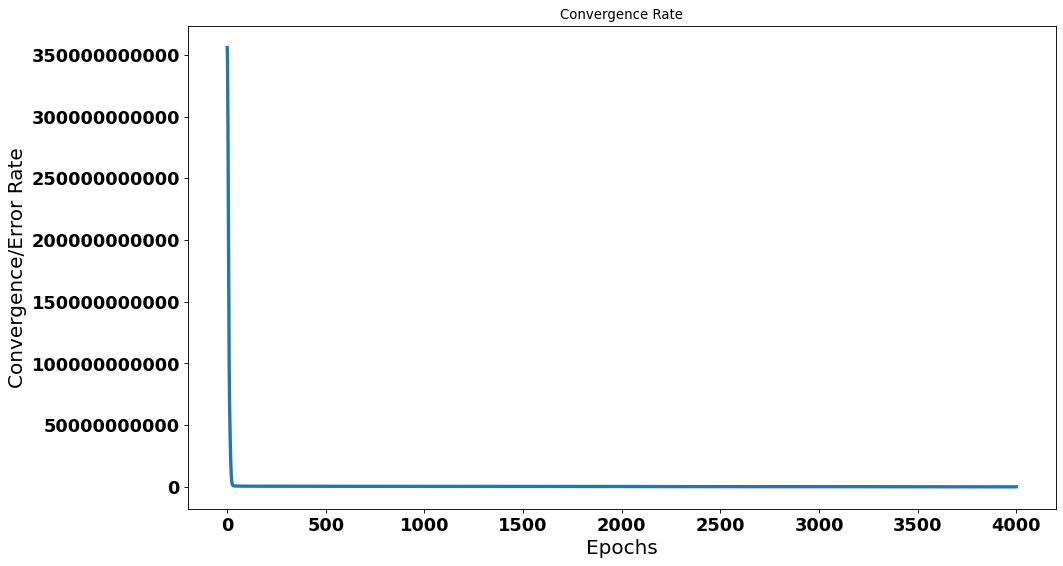

In [37]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
plt.title('Convergence Rate')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Convergence/Error Rate", fontsize=18)
plt.show()

In [38]:
min(fitting_amfe.history['loss'])

42837628.0

#### Training parameters (weights and biases) values of trained ANN

In [39]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[150.06326   165.3737    105.01441   ...  99.79526    83.90614
   93.3618   ]
 [ 84.098564   98.963524   75.20651   ...  71.64322    63.915867
   68.31609  ]
 [ 17.91857    27.386015   36.976532  ...  35.22847    32.084827
   33.668823 ]
 [-29.713121  -27.046265    6.9661736 ...   5.854008    3.9117155
    5.264418 ]
 [-61.672993  -64.13679   -14.030703  ... -15.311037  -19.43838
  -16.704136 ]
 [-85.848694  -91.847176  -31.65049   ... -33.995594  -41.64203
  -36.425182 ]]

 Hidden Layer 1 biases: 
 [ 3.92522583e+01  4.07871704e+01  5.79776704e-01 -2.70681000e+01
 -4.93564177e+00  1.05074120e+01  9.95933437e+00 -3.54242210e+01
 -2.79426217e-01 -1.48555460e+01 -8.73632145e+00  7.88016844e+00
  9.60964012e+00  1.21665964e+01  7.78371191e+00  1.66051388e+01
 -1.80434532e+01  3.76201820e+01  1.05741329e+01  3.96379471e+01
 -3.56385307e+01  1.23712215e+01 -3.32908630e+01  7.76917934e+00
  1.65931511e+01  1.40702209e+01 -5.39350748e+00  4.16115570e+01
 -2.54532566e+01

#### Evaluating model on train and test sets

In [40]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

#### An evaluation report of ANN and metrics

In [41]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

21/21 [==============================] - 0s 2ms/step - loss: 42388304.0000 - mean_absolute_error: 3719.8972
[42388304.0, 3719.897216796875]
2/2 [==============================] - 0s 16ms/step - loss: 3045956096.0000 - mean_absolute_error: 36758.0391
[3045956096.0, 36758.0390625]


<h4>Plots between Predictions and Acutal Data for Training and Test Set</h4>
<p>The graphs has been plotted for training and test sets where grpahs in first column are showing predictions and 2nd column is represeting error between predicted and actual value.
    <br>
First row graphs is plotted for training data. 2nd row graph is plotted for test data.
    <br>
Remember: Training and test data were splitted by taking 0.05 ratio for test data with no randomization.</p>

In [42]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(1455,)

In [43]:
# # plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=13)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates_train, 
#          ann_evaluation_model_prediction_on_training[:,0], '*b', 
#          ann_evaluation_model_prediction_on_training[:,1], '*r', 
#          ann_evaluation_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.show()

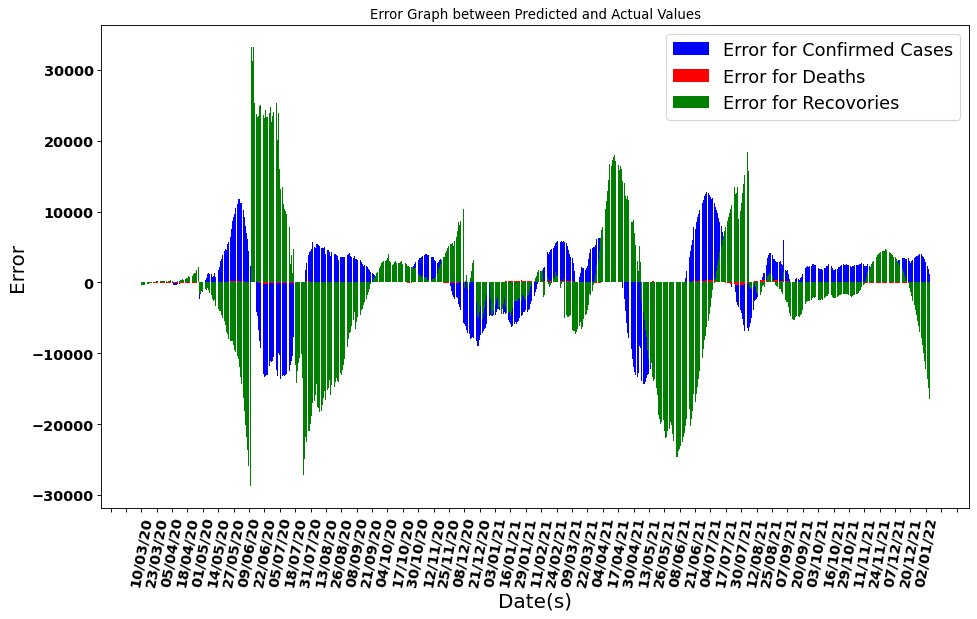

In [44]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.show()

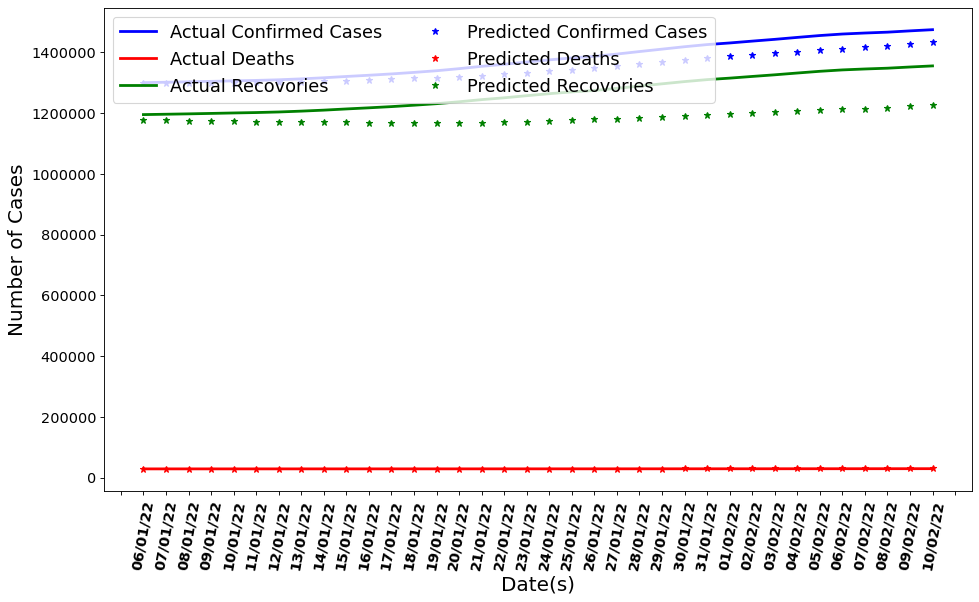

In [45]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e4)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

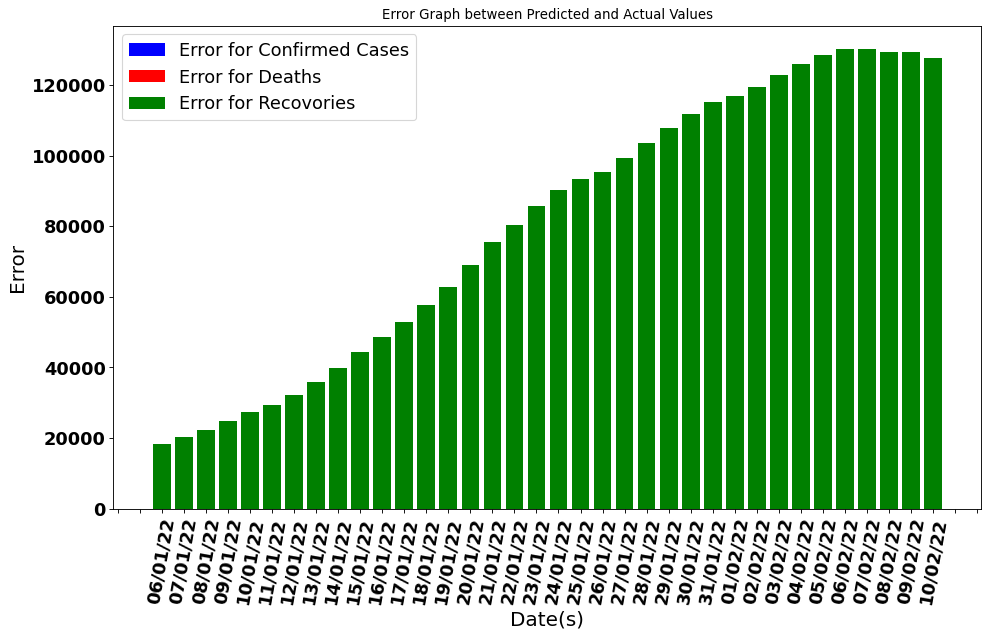

In [46]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.yticks(weight='bold')
plt.show()

# 2 - Training on whole data and prediction on future data

In [47]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [48]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Epoch 1/4000
22/22 [==============================] - 1s 2ms/step - loss: 397338968064.0000 - mean_absolute_error: 429371.0938
Epoch 2/4000
22/22 [==============================] - 0s 2ms/step - loss: 390661832704.0000 - mean_absolute_error: 424150.2188
Epoch 3/4000
22/22 [==============================] - 0s 2ms/step - loss: 373614837760.0000 - mean_absolute_error: 413995.8750
Epoch 4/4000
22/22 [==============================] - 0s 2ms/step - loss: 345584992256.0000 - mean_absolute_error: 398335.5938
Epoch 5/4000
22/22 [==============================] - 0s 2ms/step - loss: 307019841536.0000 - mean_absolute_error: 376530.1875
Epoch 6/4000
22/22 [==============================] - 0s 2ms/step - loss: 263072169984.0000 - mean_absolute_error: 350526.5000
Epoch 7/4000
22/22 [==============================] - 0s 3ms/step - loss: 217135120384.0000 - mean_absolute_error: 319762.3125
Epoch 8/4000
22/22 [==============================] - 0s 2ms/step - loss: 174353088512.0000 - mean_absolute_err

22/22 [==============================] - 0s 2ms/step - loss: 538722304.0000 - mean_absolute_error: 15093.4326
Epoch 66/4000
22/22 [==============================] - 0s 3ms/step - loss: 538250240.0000 - mean_absolute_error: 14844.5547
Epoch 67/4000
22/22 [==============================] - 0s 2ms/step - loss: 536710464.0000 - mean_absolute_error: 14835.7383
Epoch 68/4000
22/22 [==============================] - 0s 3ms/step - loss: 535126368.0000 - mean_absolute_error: 14828.2500
Epoch 69/4000
22/22 [==============================] - 0s 2ms/step - loss: 534999968.0000 - mean_absolute_error: 14790.9531
Epoch 70/4000
22/22 [==============================] - 0s 2ms/step - loss: 533625152.0000 - mean_absolute_error: 14764.2500
Epoch 71/4000
22/22 [==============================] - 0s 2ms/step - loss: 533773664.0000 - mean_absolute_error: 14772.2402
Epoch 72/4000
22/22 [==============================] - 0s 2ms/step - loss: 533328576.0000 - mean_absolute_error: 14757.8857
Epoch 73/4000
22/22 [=

22/22 [==============================] - 0s 2ms/step - loss: 519842176.0000 - mean_absolute_error: 14558.8359
Epoch 131/4000
22/22 [==============================] - 0s 2ms/step - loss: 516210400.0000 - mean_absolute_error: 14371.0957
Epoch 132/4000
22/22 [==============================] - 0s 2ms/step - loss: 518126592.0000 - mean_absolute_error: 14410.2500
Epoch 133/4000
22/22 [==============================] - 0s 2ms/step - loss: 519694336.0000 - mean_absolute_error: 14450.7295
Epoch 134/4000
22/22 [==============================] - 0s 2ms/step - loss: 519197728.0000 - mean_absolute_error: 14466.7051
Epoch 135/4000
22/22 [==============================] - 0s 1ms/step - loss: 515779648.0000 - mean_absolute_error: 14410.7842
Epoch 136/4000
22/22 [==============================] - 0s 2ms/step - loss: 516748704.0000 - mean_absolute_error: 14438.4648
Epoch 137/4000
22/22 [==============================] - 0s 2ms/step - loss: 515965472.0000 - mean_absolute_error: 14429.5830
Epoch 138/4000


22/22 [==============================] - 0s 2ms/step - loss: 511576800.0000 - mean_absolute_error: 14347.2578
Epoch 196/4000
22/22 [==============================] - 0s 1ms/step - loss: 510141792.0000 - mean_absolute_error: 14370.8125
Epoch 197/4000
22/22 [==============================] - 0s 1ms/step - loss: 509967232.0000 - mean_absolute_error: 14290.5947
Epoch 198/4000
22/22 [==============================] - 0s 1ms/step - loss: 513047168.0000 - mean_absolute_error: 14434.0156
Epoch 199/4000
22/22 [==============================] - 0s 1ms/step - loss: 509392352.0000 - mean_absolute_error: 14319.9307
Epoch 200/4000
22/22 [==============================] - 0s 2ms/step - loss: 511411168.0000 - mean_absolute_error: 14381.4863
Epoch 201/4000
22/22 [==============================] - 0s 1ms/step - loss: 509957760.0000 - mean_absolute_error: 14258.3672
Epoch 202/4000
22/22 [==============================] - 0s 2ms/step - loss: 509887968.0000 - mean_absolute_error: 14316.7080
Epoch 203/4000


22/22 [==============================] - 0s 2ms/step - loss: 508414016.0000 - mean_absolute_error: 14499.5332
Epoch 261/4000
22/22 [==============================] - 0s 1ms/step - loss: 506593888.0000 - mean_absolute_error: 14460.3281
Epoch 262/4000
22/22 [==============================] - 0s 2ms/step - loss: 503534304.0000 - mean_absolute_error: 14446.4863
Epoch 263/4000
22/22 [==============================] - 0s 2ms/step - loss: 503248832.0000 - mean_absolute_error: 14420.6006
Epoch 264/4000
22/22 [==============================] - 0s 1ms/step - loss: 501477696.0000 - mean_absolute_error: 14261.2266
Epoch 265/4000
22/22 [==============================] - 0s 2ms/step - loss: 502137024.0000 - mean_absolute_error: 14305.8027
Epoch 266/4000
22/22 [==============================] - 0s 2ms/step - loss: 502284128.0000 - mean_absolute_error: 14355.3711
Epoch 267/4000
22/22 [==============================] - 0s 2ms/step - loss: 503500224.0000 - mean_absolute_error: 14395.4932
Epoch 268/4000


22/22 [==============================] - 0s 2ms/step - loss: 489612384.0000 - mean_absolute_error: 14157.3418
Epoch 326/4000
22/22 [==============================] - 0s 2ms/step - loss: 489924864.0000 - mean_absolute_error: 14289.3643
Epoch 327/4000
22/22 [==============================] - 0s 1ms/step - loss: 490047072.0000 - mean_absolute_error: 14159.8701
Epoch 328/4000
22/22 [==============================] - 0s 1ms/step - loss: 486994016.0000 - mean_absolute_error: 14049.9346
Epoch 329/4000
22/22 [==============================] - 0s 2ms/step - loss: 486914112.0000 - mean_absolute_error: 14052.7822
Epoch 330/4000
22/22 [==============================] - 0s 1ms/step - loss: 487128000.0000 - mean_absolute_error: 14213.9512
Epoch 331/4000
22/22 [==============================] - ETA: 0s - loss: 413662720.0000 - mean_absolute_error: 12636.087 - 0s 1ms/step - loss: 484719360.0000 - mean_absolute_error: 13981.4150
Epoch 332/4000
22/22 [==============================] - 0s 2ms/step - loss

22/22 [==============================] - 0s 2ms/step - loss: 470513760.0000 - mean_absolute_error: 13843.4482
Epoch 391/4000
22/22 [==============================] - 0s 2ms/step - loss: 471625408.0000 - mean_absolute_error: 13823.6328
Epoch 392/4000
22/22 [==============================] - 0s 1ms/step - loss: 473783200.0000 - mean_absolute_error: 13848.8760
Epoch 393/4000
22/22 [==============================] - 0s 2ms/step - loss: 469268512.0000 - mean_absolute_error: 13755.2363
Epoch 394/4000
22/22 [==============================] - 0s 2ms/step - loss: 475198240.0000 - mean_absolute_error: 13813.3271
Epoch 395/4000
22/22 [==============================] - 0s 2ms/step - loss: 478288768.0000 - mean_absolute_error: 14115.7998
Epoch 396/4000
22/22 [==============================] - 0s 1ms/step - loss: 481207968.0000 - mean_absolute_error: 14250.6924
Epoch 397/4000
22/22 [==============================] - 0s 2ms/step - loss: 474083328.0000 - mean_absolute_error: 13757.3799
Epoch 398/4000


22/22 [==============================] - 0s 1ms/step - loss: 457572832.0000 - mean_absolute_error: 13552.4648
Epoch 456/4000
22/22 [==============================] - 0s 1ms/step - loss: 458892160.0000 - mean_absolute_error: 13638.9336
Epoch 457/4000
22/22 [==============================] - 0s 2ms/step - loss: 457252704.0000 - mean_absolute_error: 13580.2549
Epoch 458/4000
22/22 [==============================] - 0s 1ms/step - loss: 458512640.0000 - mean_absolute_error: 13580.0625
Epoch 459/4000
22/22 [==============================] - 0s 2ms/step - loss: 459732704.0000 - mean_absolute_error: 13659.8721
Epoch 460/4000
22/22 [==============================] - 0s 2ms/step - loss: 460473664.0000 - mean_absolute_error: 13689.2578
Epoch 461/4000
22/22 [==============================] - 0s 2ms/step - loss: 459743136.0000 - mean_absolute_error: 13582.6699
Epoch 462/4000
22/22 [==============================] - 0s 2ms/step - loss: 457265280.0000 - mean_absolute_error: 13620.7656
Epoch 463/4000


22/22 [==============================] - 0s 2ms/step - loss: 451791680.0000 - mean_absolute_error: 13512.1055
Epoch 521/4000
22/22 [==============================] - 0s 1ms/step - loss: 446117440.0000 - mean_absolute_error: 13388.4434
Epoch 522/4000
22/22 [==============================] - 0s 2ms/step - loss: 452007712.0000 - mean_absolute_error: 13632.7256
Epoch 523/4000
22/22 [==============================] - 0s 1ms/step - loss: 445612960.0000 - mean_absolute_error: 13369.3887
Epoch 524/4000
22/22 [==============================] - 0s 1ms/step - loss: 448427456.0000 - mean_absolute_error: 13496.3828
Epoch 525/4000
22/22 [==============================] - 0s 1ms/step - loss: 453566304.0000 - mean_absolute_error: 13595.9854
Epoch 526/4000
22/22 [==============================] - 0s 2ms/step - loss: 446126528.0000 - mean_absolute_error: 13437.3447
Epoch 527/4000
22/22 [==============================] - 0s 2ms/step - loss: 448592192.0000 - mean_absolute_error: 13362.8223
Epoch 528/4000


22/22 [==============================] - 0s 1ms/step - loss: 437055904.0000 - mean_absolute_error: 13351.0371
Epoch 586/4000
22/22 [==============================] - 0s 2ms/step - loss: 439113888.0000 - mean_absolute_error: 13332.3301
Epoch 587/4000
22/22 [==============================] - 0s 2ms/step - loss: 438527232.0000 - mean_absolute_error: 13346.3672
Epoch 588/4000
22/22 [==============================] - 0s 2ms/step - loss: 441881696.0000 - mean_absolute_error: 13476.4756
Epoch 589/4000
22/22 [==============================] - 0s 2ms/step - loss: 438029952.0000 - mean_absolute_error: 13319.7480
Epoch 590/4000
22/22 [==============================] - 0s 2ms/step - loss: 438312096.0000 - mean_absolute_error: 13204.0098
Epoch 591/4000
22/22 [==============================] - 0s 2ms/step - loss: 440929696.0000 - mean_absolute_error: 13474.9570
Epoch 592/4000
22/22 [==============================] - 0s 2ms/step - loss: 439872256.0000 - mean_absolute_error: 13322.0244
Epoch 593/4000


22/22 [==============================] - 0s 2ms/step - loss: 430309184.0000 - mean_absolute_error: 13275.9648
Epoch 651/4000
22/22 [==============================] - 0s 2ms/step - loss: 427394016.0000 - mean_absolute_error: 13149.5088
Epoch 652/4000
22/22 [==============================] - 0s 2ms/step - loss: 425086176.0000 - mean_absolute_error: 13054.8438
Epoch 653/4000
22/22 [==============================] - 0s 2ms/step - loss: 429413280.0000 - mean_absolute_error: 13144.8701
Epoch 654/4000
22/22 [==============================] - 0s 2ms/step - loss: 426294816.0000 - mean_absolute_error: 13149.2461
Epoch 655/4000
22/22 [==============================] - 0s 2ms/step - loss: 424836928.0000 - mean_absolute_error: 13149.4150
Epoch 656/4000
22/22 [==============================] - 0s 2ms/step - loss: 426656320.0000 - mean_absolute_error: 13119.6104
Epoch 657/4000
22/22 [==============================] - 0s 1ms/step - loss: 429243136.0000 - mean_absolute_error: 13215.8545
Epoch 658/4000


22/22 [==============================] - 0s 2ms/step - loss: 421827360.0000 - mean_absolute_error: 13154.8320
Epoch 716/4000
22/22 [==============================] - 0s 2ms/step - loss: 419542880.0000 - mean_absolute_error: 13055.7881
Epoch 717/4000
22/22 [==============================] - 0s 2ms/step - loss: 418002976.0000 - mean_absolute_error: 13011.7012
Epoch 718/4000
22/22 [==============================] - 0s 2ms/step - loss: 428236416.0000 - mean_absolute_error: 13393.2148
Epoch 719/4000
22/22 [==============================] - 0s 2ms/step - loss: 421873984.0000 - mean_absolute_error: 13146.8506
Epoch 720/4000
22/22 [==============================] - 0s 1ms/step - loss: 419555040.0000 - mean_absolute_error: 13049.5449
Epoch 721/4000
22/22 [==============================] - 0s 998us/step - loss: 417834592.0000 - mean_absolute_error: 13098.7627
Epoch 722/4000
22/22 [==============================] - 0s 2ms/step - loss: 418203296.0000 - mean_absolute_error: 12980.3486
Epoch 723/400

22/22 [==============================] - 0s 2ms/step - loss: 415323168.0000 - mean_absolute_error: 13071.8682
Epoch 781/4000
22/22 [==============================] - 0s 2ms/step - loss: 413012288.0000 - mean_absolute_error: 13072.7393
Epoch 782/4000
22/22 [==============================] - 0s 2ms/step - loss: 419371008.0000 - mean_absolute_error: 13219.6543
Epoch 783/4000
22/22 [==============================] - 0s 2ms/step - loss: 415132288.0000 - mean_absolute_error: 13008.5322
Epoch 784/4000
22/22 [==============================] - 0s 2ms/step - loss: 415310432.0000 - mean_absolute_error: 13051.9775
Epoch 785/4000
22/22 [==============================] - 0s 1ms/step - loss: 412744128.0000 - mean_absolute_error: 13042.7686
Epoch 786/4000
22/22 [==============================] - 0s 1ms/step - loss: 415500512.0000 - mean_absolute_error: 13115.0557
Epoch 787/4000
22/22 [==============================] - 0s 1ms/step - loss: 413209568.0000 - mean_absolute_error: 12977.6611
Epoch 788/4000


22/22 [==============================] - 0s 2ms/step - loss: 406490912.0000 - mean_absolute_error: 12957.1777
Epoch 846/4000
22/22 [==============================] - 0s 1ms/step - loss: 406800608.0000 - mean_absolute_error: 12955.9541
Epoch 847/4000
22/22 [==============================] - 0s 2ms/step - loss: 404572928.0000 - mean_absolute_error: 12887.5693
Epoch 848/4000
22/22 [==============================] - 0s 2ms/step - loss: 405157504.0000 - mean_absolute_error: 12928.1475
Epoch 849/4000
22/22 [==============================] - 0s 1ms/step - loss: 406290016.0000 - mean_absolute_error: 13013.8750
Epoch 850/4000
22/22 [==============================] - 0s 1ms/step - loss: 412512672.0000 - mean_absolute_error: 13135.1650
Epoch 851/4000
22/22 [==============================] - 0s 1ms/step - loss: 416210880.0000 - mean_absolute_error: 13163.5537
Epoch 852/4000
22/22 [==============================] - 0s 2ms/step - loss: 404323712.0000 - mean_absolute_error: 12785.2207
Epoch 853/4000


22/22 [==============================] - 0s 2ms/step - loss: 401819168.0000 - mean_absolute_error: 12879.3086
Epoch 911/4000
22/22 [==============================] - 0s 2ms/step - loss: 400174688.0000 - mean_absolute_error: 12844.6543
Epoch 912/4000
22/22 [==============================] - 0s 2ms/step - loss: 400719648.0000 - mean_absolute_error: 12906.9648
Epoch 913/4000
22/22 [==============================] - ETA: 0s - loss: 384220992.0000 - mean_absolute_error: 12907.854 - 0s 2ms/step - loss: 398820160.0000 - mean_absolute_error: 12860.6738
Epoch 914/4000
22/22 [==============================] - 0s 2ms/step - loss: 401010304.0000 - mean_absolute_error: 12914.1650
Epoch 915/4000
22/22 [==============================] - 0s 1ms/step - loss: 399990912.0000 - mean_absolute_error: 12912.9717
Epoch 916/4000
22/22 [==============================] - 0s 1ms/step - loss: 399521824.0000 - mean_absolute_error: 12885.2646
Epoch 917/4000
22/22 [==============================] - 0s 2ms/step - loss

22/22 [==============================] - 0s 2ms/step - loss: 394597952.0000 - mean_absolute_error: 12821.0508
Epoch 976/4000
22/22 [==============================] - 0s 1ms/step - loss: 395417760.0000 - mean_absolute_error: 12836.1465
Epoch 977/4000
22/22 [==============================] - 0s 2ms/step - loss: 394653792.0000 - mean_absolute_error: 12735.8096
Epoch 978/4000
22/22 [==============================] - 0s 1ms/step - loss: 399892288.0000 - mean_absolute_error: 12925.8262
Epoch 979/4000
22/22 [==============================] - 0s 2ms/step - loss: 399730720.0000 - mean_absolute_error: 12911.2119
Epoch 980/4000
22/22 [==============================] - 0s 1ms/step - loss: 396829568.0000 - mean_absolute_error: 12886.6035
Epoch 981/4000
22/22 [==============================] - 0s 1ms/step - loss: 394336000.0000 - mean_absolute_error: 12823.9131
Epoch 982/4000
22/22 [==============================] - ETA: 0s - loss: 676996224.0000 - mean_absolute_error: 17995.638 - 0s 1ms/step - loss

22/22 [==============================] - 0s 1ms/step - loss: 391726848.0000 - mean_absolute_error: 12753.1846
Epoch 1040/4000
22/22 [==============================] - 0s 2ms/step - loss: 391737440.0000 - mean_absolute_error: 12841.4453
Epoch 1041/4000
22/22 [==============================] - 0s 1ms/step - loss: 392530112.0000 - mean_absolute_error: 12791.3857
Epoch 1042/4000
22/22 [==============================] - 0s 1ms/step - loss: 393160640.0000 - mean_absolute_error: 12861.5693
Epoch 1043/4000
22/22 [==============================] - 0s 2ms/step - loss: 392345792.0000 - mean_absolute_error: 12795.3057
Epoch 1044/4000
22/22 [==============================] - 0s 2ms/step - loss: 389869344.0000 - mean_absolute_error: 12766.3047
Epoch 1045/4000
22/22 [==============================] - 0s 2ms/step - loss: 386874240.0000 - mean_absolute_error: 12655.6514
Epoch 1046/4000
22/22 [==============================] - 0s 1ms/step - loss: 389867712.0000 - mean_absolute_error: 12781.2500
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 386967424.0000 - mean_absolute_error: 12746.3115
Epoch 1105/4000
22/22 [==============================] - 0s 1ms/step - loss: 386786400.0000 - mean_absolute_error: 12758.4180
Epoch 1106/4000
22/22 [==============================] - 0s 768us/step - loss: 387719552.0000 - mean_absolute_error: 12765.5918
Epoch 1107/4000
22/22 [==============================] - 0s 1ms/step - loss: 386988736.0000 - mean_absolute_error: 12671.4453
Epoch 1108/4000
22/22 [==============================] - 0s 1ms/step - loss: 386817120.0000 - mean_absolute_error: 12728.7598
Epoch 1109/4000
22/22 [==============================] - 0s 2ms/step - loss: 388057056.0000 - mean_absolute_error: 12764.4277
Epoch 1110/4000
22/22 [==============================] - 0s 2ms/step - loss: 390869440.0000 - mean_absolute_error: 12883.1035
Epoch 1111/4000
22/22 [==============================] - 0s 2ms/step - loss: 402992064.0000 - mean_absolute_error: 13070.2627
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 390513056.0000 - mean_absolute_error: 12786.5020
Epoch 1169/4000
22/22 [==============================] - 0s 2ms/step - loss: 384423232.0000 - mean_absolute_error: 12760.4824
Epoch 1170/4000
22/22 [==============================] - 0s 1ms/step - loss: 383379680.0000 - mean_absolute_error: 12676.3984
Epoch 1171/4000
22/22 [==============================] - 0s 1ms/step - loss: 383104544.0000 - mean_absolute_error: 12739.3496
Epoch 1172/4000
22/22 [==============================] - 0s 2ms/step - loss: 385461440.0000 - mean_absolute_error: 12838.2617
Epoch 1173/4000
22/22 [==============================] - 0s 2ms/step - loss: 388683904.0000 - mean_absolute_error: 12754.5322
Epoch 1174/4000
22/22 [==============================] - 0s 1ms/step - loss: 385928352.0000 - mean_absolute_error: 12822.8564
Epoch 1175/4000
22/22 [==============================] - 0s 2ms/step - loss: 381613952.0000 - mean_absolute_error: 12618.4854
Epoch 11

22/22 [==============================] - 0s 2ms/step - loss: 377707424.0000 - mean_absolute_error: 12579.3770
Epoch 1234/4000
22/22 [==============================] - 0s 2ms/step - loss: 378962144.0000 - mean_absolute_error: 12685.1895
Epoch 1235/4000
22/22 [==============================] - 0s 2ms/step - loss: 383524960.0000 - mean_absolute_error: 12741.8818
Epoch 1236/4000
22/22 [==============================] - 0s 2ms/step - loss: 380095136.0000 - mean_absolute_error: 12661.3027
Epoch 1237/4000
22/22 [==============================] - 0s 2ms/step - loss: 380932704.0000 - mean_absolute_error: 12711.9561
Epoch 1238/4000
22/22 [==============================] - 0s 1ms/step - loss: 380548800.0000 - mean_absolute_error: 12668.2607
Epoch 1239/4000
22/22 [==============================] - 0s 988us/step - loss: 381061504.0000 - mean_absolute_error: 12683.1963
Epoch 1240/4000
22/22 [==============================] - 0s 1ms/step - loss: 378015328.0000 - mean_absolute_error: 12637.3398
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 377352096.0000 - mean_absolute_error: 12650.1465
Epoch 1299/4000
22/22 [==============================] - 0s 1ms/step - loss: 374922080.0000 - mean_absolute_error: 12563.4385
Epoch 1300/4000
22/22 [==============================] - 0s 2ms/step - loss: 373359936.0000 - mean_absolute_error: 12509.6133
Epoch 1301/4000
22/22 [==============================] - 0s 2ms/step - loss: 374913568.0000 - mean_absolute_error: 12586.8779
Epoch 1302/4000
22/22 [==============================] - 0s 2ms/step - loss: 373829312.0000 - mean_absolute_error: 12627.8379
Epoch 1303/4000
22/22 [==============================] - 0s 2ms/step - loss: 378517632.0000 - mean_absolute_error: 12698.9531
Epoch 1304/4000
22/22 [==============================] - 0s 1ms/step - loss: 376488416.0000 - mean_absolute_error: 12524.3643
Epoch 1305/4000
22/22 [==============================] - 0s 993us/step - loss: 379884608.0000 - mean_absolute_error: 12751.2148
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 372360960.0000 - mean_absolute_error: 12592.6162
Epoch 1364/4000
22/22 [==============================] - 0s 2ms/step - loss: 375138976.0000 - mean_absolute_error: 12651.9150
Epoch 1365/4000
22/22 [==============================] - 0s 1ms/step - loss: 381665120.0000 - mean_absolute_error: 12686.1836
Epoch 1366/4000
22/22 [==============================] - 0s 2ms/step - loss: 381187392.0000 - mean_absolute_error: 12814.2334
Epoch 1367/4000
22/22 [==============================] - 0s 2ms/step - loss: 377066368.0000 - mean_absolute_error: 12626.7139
Epoch 1368/4000
22/22 [==============================] - 0s 2ms/step - loss: 375989952.0000 - mean_absolute_error: 12694.0693
Epoch 1369/4000
22/22 [==============================] - 0s 2ms/step - loss: 374295872.0000 - mean_absolute_error: 12628.5889
Epoch 1370/4000
22/22 [==============================] - 0s 2ms/step - loss: 373451200.0000 - mean_absolute_error: 12641.7949
Epoch 13

22/22 [==============================] - 0s 2ms/step - loss: 371372992.0000 - mean_absolute_error: 12566.0986
Epoch 1429/4000
22/22 [==============================] - 0s 1ms/step - loss: 374449856.0000 - mean_absolute_error: 12556.4854
Epoch 1430/4000
22/22 [==============================] - 0s 2ms/step - loss: 378375776.0000 - mean_absolute_error: 12701.6660
Epoch 1431/4000
22/22 [==============================] - 0s 2ms/step - loss: 375077440.0000 - mean_absolute_error: 12531.1533
Epoch 1432/4000
22/22 [==============================] - 0s 2ms/step - loss: 372454112.0000 - mean_absolute_error: 12577.0596
Epoch 1433/4000
22/22 [==============================] - 0s 1ms/step - loss: 372682720.0000 - mean_absolute_error: 12530.5205
Epoch 1434/4000
22/22 [==============================] - 0s 2ms/step - loss: 372782368.0000 - mean_absolute_error: 12605.7666
Epoch 1435/4000
22/22 [==============================] - 0s 2ms/step - loss: 373325696.0000 - mean_absolute_error: 12701.8281
Epoch 14

22/22 [==============================] - 0s 2ms/step - loss: 374578400.0000 - mean_absolute_error: 12548.9092
Epoch 1493/4000
22/22 [==============================] - 0s 2ms/step - loss: 368027296.0000 - mean_absolute_error: 12491.4180
Epoch 1494/4000
22/22 [==============================] - 0s 2ms/step - loss: 366961120.0000 - mean_absolute_error: 12554.9629
Epoch 1495/4000
22/22 [==============================] - 0s 2ms/step - loss: 366834528.0000 - mean_absolute_error: 12425.5947
Epoch 1496/4000
22/22 [==============================] - 0s 2ms/step - loss: 375819392.0000 - mean_absolute_error: 12582.2773
Epoch 1497/4000
22/22 [==============================] - 0s 1ms/step - loss: 367574752.0000 - mean_absolute_error: 12574.0039
Epoch 1498/4000
22/22 [==============================] - 0s 2ms/step - loss: 367161376.0000 - mean_absolute_error: 12450.7852
Epoch 1499/4000
22/22 [==============================] - 0s 1ms/step - loss: 375346528.0000 - mean_absolute_error: 12666.3584
Epoch 15

22/22 [==============================] - 0s 2ms/step - loss: 369008768.0000 - mean_absolute_error: 12443.3896
Epoch 1558/4000
22/22 [==============================] - 0s 2ms/step - loss: 365331392.0000 - mean_absolute_error: 12434.2988
Epoch 1559/4000
22/22 [==============================] - 0s 2ms/step - loss: 372795232.0000 - mean_absolute_error: 12631.9756
Epoch 1560/4000
22/22 [==============================] - 0s 890us/step - loss: 367035520.0000 - mean_absolute_error: 12336.5957
Epoch 1561/4000
22/22 [==============================] - 0s 1ms/step - loss: 378140768.0000 - mean_absolute_error: 12736.4023
Epoch 1562/4000
22/22 [==============================] - 0s 2ms/step - loss: 376015968.0000 - mean_absolute_error: 12735.7383
Epoch 1563/4000
22/22 [==============================] - 0s 1ms/step - loss: 367705504.0000 - mean_absolute_error: 12470.7734
Epoch 1564/4000
22/22 [==============================] - 0s 940us/step - loss: 365436224.0000 - mean_absolute_error: 12425.4883
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 363249856.0000 - mean_absolute_error: 12346.5459
Epoch 1622/4000
22/22 [==============================] - 0s 2ms/step - loss: 363281888.0000 - mean_absolute_error: 12407.6045
Epoch 1623/4000
22/22 [==============================] - 0s 854us/step - loss: 364350976.0000 - mean_absolute_error: 12483.5137
Epoch 1624/4000
22/22 [==============================] - 0s 1ms/step - loss: 362966944.0000 - mean_absolute_error: 12428.7705
Epoch 1625/4000
22/22 [==============================] - 0s 2ms/step - loss: 363045984.0000 - mean_absolute_error: 12459.9189
Epoch 1626/4000
22/22 [==============================] - 0s 962us/step - loss: 371520960.0000 - mean_absolute_error: 12647.9316
Epoch 1627/4000
22/22 [==============================] - 0s 824us/step - loss: 366588032.0000 - mean_absolute_error: 12391.4824
Epoch 1628/4000
22/22 [==============================] - 0s 2ms/step - loss: 368498080.0000 - mean_absolute_error: 12484.3672
Ep

22/22 [==============================] - 0s 2ms/step - loss: 366751936.0000 - mean_absolute_error: 12431.5537
Epoch 1687/4000
22/22 [==============================] - 0s 2ms/step - loss: 361150080.0000 - mean_absolute_error: 12463.6729
Epoch 1688/4000
22/22 [==============================] - 0s 1ms/step - loss: 365129664.0000 - mean_absolute_error: 12492.8477
Epoch 1689/4000
22/22 [==============================] - 0s 940us/step - loss: 364235424.0000 - mean_absolute_error: 12344.6104
Epoch 1690/4000
22/22 [==============================] - 0s 988us/step - loss: 365841472.0000 - mean_absolute_error: 12498.3457
Epoch 1691/4000
22/22 [==============================] - 0s 985us/step - loss: 361683648.0000 - mean_absolute_error: 12305.1748
Epoch 1692/4000
22/22 [==============================] - 0s 1ms/step - loss: 363883264.0000 - mean_absolute_error: 12519.8311
Epoch 1693/4000
22/22 [==============================] - 0s 1ms/step - loss: 360365280.0000 - mean_absolute_error: 12385.2676
Ep

22/22 [==============================] - 0s 2ms/step - loss: 371849920.0000 - mean_absolute_error: 12659.4805
Epoch 1750/4000
22/22 [==============================] - 0s 2ms/step - loss: 365228992.0000 - mean_absolute_error: 12400.6758
Epoch 1751/4000
22/22 [==============================] - 0s 1ms/step - loss: 363188704.0000 - mean_absolute_error: 12434.5195
Epoch 1752/4000
22/22 [==============================] - 0s 2ms/step - loss: 364512576.0000 - mean_absolute_error: 12424.0869
Epoch 1753/4000
22/22 [==============================] - 0s 1ms/step - loss: 362257312.0000 - mean_absolute_error: 12406.9502
Epoch 1754/4000
22/22 [==============================] - 0s 2ms/step - loss: 361156768.0000 - mean_absolute_error: 12380.7227
Epoch 1755/4000
22/22 [==============================] - 0s 1ms/step - loss: 365955552.0000 - mean_absolute_error: 12438.4883
Epoch 1756/4000
22/22 [==============================] - 0s 995us/step - loss: 357457728.0000 - mean_absolute_error: 12284.8203
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 355815744.0000 - mean_absolute_error: 12306.4307
Epoch 1814/4000
22/22 [==============================] - 0s 1ms/step - loss: 367363136.0000 - mean_absolute_error: 12526.0508
Epoch 1815/4000
22/22 [==============================] - 0s 2ms/step - loss: 359552704.0000 - mean_absolute_error: 12337.8350
Epoch 1816/4000
22/22 [==============================] - 0s 2ms/step - loss: 359681888.0000 - mean_absolute_error: 12318.7842
Epoch 1817/4000
22/22 [==============================] - 0s 1ms/step - loss: 361721376.0000 - mean_absolute_error: 12392.4990
Epoch 1818/4000
22/22 [==============================] - 0s 2ms/step - loss: 358260768.0000 - mean_absolute_error: 12330.1094
Epoch 1819/4000
22/22 [==============================] - 0s 993us/step - loss: 356899200.0000 - mean_absolute_error: 12237.6377
Epoch 1820/4000
22/22 [==============================] - 0s 1ms/step - loss: 359204704.0000 - mean_absolute_error: 12323.6641
Epoch 

22/22 [==============================] - 0s 997us/step - loss: 354719296.0000 - mean_absolute_error: 12334.8320
Epoch 1878/4000
22/22 [==============================] - 0s 2ms/step - loss: 360567808.0000 - mean_absolute_error: 12226.1299
Epoch 1879/4000
22/22 [==============================] - 0s 2ms/step - loss: 353929024.0000 - mean_absolute_error: 12295.1270
Epoch 1880/4000
22/22 [==============================] - 0s 1ms/step - loss: 355547776.0000 - mean_absolute_error: 12241.8848
Epoch 1881/4000
22/22 [==============================] - 0s 805us/step - loss: 359720064.0000 - mean_absolute_error: 12322.9434
Epoch 1882/4000
22/22 [==============================] - 0s 2ms/step - loss: 356648416.0000 - mean_absolute_error: 12284.8076
Epoch 1883/4000
22/22 [==============================] - 0s 1ms/step - loss: 353348640.0000 - mean_absolute_error: 12128.8916
Epoch 1884/4000
22/22 [==============================] - ETA: 0s - loss: 362428192.0000 - mean_absolute_error: 12331.246 - 0s 1ms/

22/22 [==============================] - 0s 2ms/step - loss: 351350336.0000 - mean_absolute_error: 12207.7695
Epoch 1941/4000
22/22 [==============================] - 0s 2ms/step - loss: 357287680.0000 - mean_absolute_error: 12305.7070
Epoch 1942/4000
22/22 [==============================] - 0s 2ms/step - loss: 354880032.0000 - mean_absolute_error: 12206.9121
Epoch 1943/4000
22/22 [==============================] - 0s 2ms/step - loss: 352562464.0000 - mean_absolute_error: 12269.0615
Epoch 1944/4000
22/22 [==============================] - 0s 2ms/step - loss: 351910144.0000 - mean_absolute_error: 12122.4805
Epoch 1945/4000
22/22 [==============================] - 0s 2ms/step - loss: 356400000.0000 - mean_absolute_error: 12277.8223
Epoch 1946/4000
22/22 [==============================] - 0s 1ms/step - loss: 355189728.0000 - mean_absolute_error: 12396.0332
Epoch 1947/4000
22/22 [==============================] - 0s 2ms/step - loss: 353309088.0000 - mean_absolute_error: 12214.2236
Epoch 19

22/22 [==============================] - 0s 1ms/step - loss: 349342592.0000 - mean_absolute_error: 12153.6758
Epoch 2005/4000
22/22 [==============================] - 0s 2ms/step - loss: 349279200.0000 - mean_absolute_error: 12134.9502
Epoch 2006/4000
22/22 [==============================] - 0s 2ms/step - loss: 352402944.0000 - mean_absolute_error: 12246.0000
Epoch 2007/4000
22/22 [==============================] - 0s 1ms/step - loss: 351907072.0000 - mean_absolute_error: 12163.5977
Epoch 2008/4000
22/22 [==============================] - 0s 2ms/step - loss: 367397696.0000 - mean_absolute_error: 12573.7695
Epoch 2009/4000
22/22 [==============================] - 0s 2ms/step - loss: 355127648.0000 - mean_absolute_error: 12265.8496
Epoch 2010/4000
22/22 [==============================] - 0s 2ms/step - loss: 351405376.0000 - mean_absolute_error: 12158.0400
Epoch 2011/4000
22/22 [==============================] - 0s 1ms/step - loss: 352512768.0000 - mean_absolute_error: 12244.1934
Epoch 20

22/22 [==============================] - 0s 2ms/step - loss: 348402528.0000 - mean_absolute_error: 12038.4697
Epoch 2070/4000
22/22 [==============================] - 0s 2ms/step - loss: 350228512.0000 - mean_absolute_error: 12077.1777
Epoch 2071/4000
22/22 [==============================] - 0s 2ms/step - loss: 355170592.0000 - mean_absolute_error: 12289.9404
Epoch 2072/4000
22/22 [==============================] - 0s 2ms/step - loss: 358989696.0000 - mean_absolute_error: 12358.5049
Epoch 2073/4000
22/22 [==============================] - 0s 2ms/step - loss: 350215776.0000 - mean_absolute_error: 12236.9697
Epoch 2074/4000
22/22 [==============================] - 0s 899us/step - loss: 345710080.0000 - mean_absolute_error: 12048.4453
Epoch 2075/4000
22/22 [==============================] - 0s 1ms/step - loss: 347855296.0000 - mean_absolute_error: 12127.0371
Epoch 2076/4000
22/22 [==============================] - 0s 1ms/step - loss: 352852480.0000 - mean_absolute_error: 12314.0713
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 346453248.0000 - mean_absolute_error: 11999.3057
Epoch 2134/4000
22/22 [==============================] - 0s 3ms/step - loss: 351362144.0000 - mean_absolute_error: 12144.8721
Epoch 2135/4000
22/22 [==============================] - 0s 2ms/step - loss: 343066720.0000 - mean_absolute_error: 12021.0029
Epoch 2136/4000
22/22 [==============================] - 0s 1ms/step - loss: 344902976.0000 - mean_absolute_error: 12061.2617
Epoch 2137/4000
22/22 [==============================] - 0s 1ms/step - loss: 346902080.0000 - mean_absolute_error: 12079.7344
Epoch 2138/4000
22/22 [==============================] - 0s 1ms/step - loss: 358144832.0000 - mean_absolute_error: 12366.9805
Epoch 2139/4000
22/22 [==============================] - 0s 1ms/step - loss: 348981888.0000 - mean_absolute_error: 12101.7168
Epoch 2140/4000
22/22 [==============================] - 0s 1ms/step - loss: 348606720.0000 - mean_absolute_error: 12142.9219
Epoch 21

22/22 [==============================] - 0s 2ms/step - loss: 345011296.0000 - mean_absolute_error: 12083.8027
Epoch 2198/4000
22/22 [==============================] - 0s 2ms/step - loss: 343506464.0000 - mean_absolute_error: 11969.0215
Epoch 2199/4000
22/22 [==============================] - 0s 2ms/step - loss: 350660544.0000 - mean_absolute_error: 12184.5801
Epoch 2200/4000
22/22 [==============================] - 0s 2ms/step - loss: 343676704.0000 - mean_absolute_error: 12046.4570
Epoch 2201/4000
22/22 [==============================] - 0s 2ms/step - loss: 350792672.0000 - mean_absolute_error: 12081.2617
Epoch 2202/4000
22/22 [==============================] - 0s 2ms/step - loss: 352439712.0000 - mean_absolute_error: 12129.7471
Epoch 2203/4000
22/22 [==============================] - ETA: 0s - loss: 288502528.0000 - mean_absolute_error: 10820.701 - 0s 2ms/step - loss: 346040128.0000 - mean_absolute_error: 12116.2148
Epoch 2204/4000
22/22 [==============================] - 0s 2ms/step

22/22 [==============================] - 0s 3ms/step - loss: 345370944.0000 - mean_absolute_error: 11950.2158
Epoch 2261/4000
22/22 [==============================] - 0s 2ms/step - loss: 342358304.0000 - mean_absolute_error: 12034.0537
Epoch 2262/4000
22/22 [==============================] - 0s 2ms/step - loss: 343722368.0000 - mean_absolute_error: 12012.1777
Epoch 2263/4000
22/22 [==============================] - 0s 2ms/step - loss: 348155488.0000 - mean_absolute_error: 12058.5244
Epoch 2264/4000
22/22 [==============================] - 0s 1ms/step - loss: 343592064.0000 - mean_absolute_error: 11968.4590
Epoch 2265/4000
22/22 [==============================] - 0s 2ms/step - loss: 345265312.0000 - mean_absolute_error: 12096.2422
Epoch 2266/4000
22/22 [==============================] - 0s 1ms/step - loss: 342700576.0000 - mean_absolute_error: 11994.0713
Epoch 2267/4000
22/22 [==============================] - 0s 1ms/step - loss: 341010432.0000 - mean_absolute_error: 11924.9287
Epoch 22

22/22 [==============================] - 0s 1ms/step - loss: 340727232.0000 - mean_absolute_error: 11957.0527
Epoch 2326/4000
22/22 [==============================] - 0s 1ms/step - loss: 341108928.0000 - mean_absolute_error: 11926.4609
Epoch 2327/4000
22/22 [==============================] - 0s 2ms/step - loss: 338301760.0000 - mean_absolute_error: 11917.7891
Epoch 2328/4000
22/22 [==============================] - 0s 1ms/step - loss: 339808640.0000 - mean_absolute_error: 11930.2344
Epoch 2329/4000
22/22 [==============================] - 0s 1ms/step - loss: 345736608.0000 - mean_absolute_error: 12120.6133
Epoch 2330/4000
22/22 [==============================] - 0s 1ms/step - loss: 340939872.0000 - mean_absolute_error: 11980.8496
Epoch 2331/4000
22/22 [==============================] - 0s 1ms/step - loss: 346694272.0000 - mean_absolute_error: 12066.7139
Epoch 2332/4000
22/22 [==============================] - 0s 1ms/step - loss: 345094176.0000 - mean_absolute_error: 11987.3213
Epoch 23

22/22 [==============================] - 0s 2ms/step - loss: 338965280.0000 - mean_absolute_error: 11874.9678
Epoch 2391/4000
22/22 [==============================] - 0s 2ms/step - loss: 339936832.0000 - mean_absolute_error: 11952.8320
Epoch 2392/4000
22/22 [==============================] - 0s 2ms/step - loss: 345407936.0000 - mean_absolute_error: 12078.1963
Epoch 2393/4000
22/22 [==============================] - 0s 2ms/step - loss: 339318944.0000 - mean_absolute_error: 11948.7754
Epoch 2394/4000
22/22 [==============================] - 0s 2ms/step - loss: 341848960.0000 - mean_absolute_error: 11951.4150
Epoch 2395/4000
22/22 [==============================] - 0s 2ms/step - loss: 342425600.0000 - mean_absolute_error: 11982.7129
Epoch 2396/4000
22/22 [==============================] - 0s 2ms/step - loss: 343082464.0000 - mean_absolute_error: 12026.4893
Epoch 2397/4000
22/22 [==============================] - 0s 1ms/step - loss: 341589952.0000 - mean_absolute_error: 11933.6846
Epoch 23

22/22 [==============================] - 0s 2ms/step - loss: 336006816.0000 - mean_absolute_error: 11877.6162
Epoch 2455/4000
22/22 [==============================] - 0s 2ms/step - loss: 336044224.0000 - mean_absolute_error: 11811.7334
Epoch 2456/4000
22/22 [==============================] - ETA: 0s - loss: 337431712.0000 - mean_absolute_error: 11971.793 - 0s 3ms/step - loss: 337477600.0000 - mean_absolute_error: 11950.9961
Epoch 2457/4000
22/22 [==============================] - 0s 3ms/step - loss: 339763712.0000 - mean_absolute_error: 11979.3682
Epoch 2458/4000
22/22 [==============================] - 0s 3ms/step - loss: 340989056.0000 - mean_absolute_error: 11896.8350
Epoch 2459/4000
22/22 [==============================] - 0s 2ms/step - loss: 337728768.0000 - mean_absolute_error: 11859.1250
Epoch 2460/4000
22/22 [==============================] - 0s 2ms/step - loss: 338617536.0000 - mean_absolute_error: 11897.0352
Epoch 2461/4000
22/22 [==============================] - 0s 2ms/step

22/22 [==============================] - 0s 948us/step - loss: 342095616.0000 - mean_absolute_error: 11930.0771
Epoch 2519/4000
22/22 [==============================] - 0s 1ms/step - loss: 331090080.0000 - mean_absolute_error: 11785.1641
Epoch 2520/4000
22/22 [==============================] - 0s 1ms/step - loss: 337524160.0000 - mean_absolute_error: 11841.0703
Epoch 2521/4000
22/22 [==============================] - 0s 873us/step - loss: 333849856.0000 - mean_absolute_error: 11748.7656
Epoch 2522/4000
22/22 [==============================] - 0s 1ms/step - loss: 334472384.0000 - mean_absolute_error: 11856.5684
Epoch 2523/4000
22/22 [==============================] - 0s 989us/step - loss: 340753280.0000 - mean_absolute_error: 11924.6309
Epoch 2524/4000
22/22 [==============================] - 0s 1ms/step - loss: 335275264.0000 - mean_absolute_error: 11861.5654
Epoch 2525/4000
22/22 [==============================] - 0s 2ms/step - loss: 334697152.0000 - mean_absolute_error: 11825.1143
Ep

22/22 [==============================] - 0s 2ms/step - loss: 332250240.0000 - mean_absolute_error: 11776.8936
Epoch 2583/4000
22/22 [==============================] - 0s 1ms/step - loss: 329165888.0000 - mean_absolute_error: 11687.7598
Epoch 2584/4000
22/22 [==============================] - 0s 2ms/step - loss: 332424544.0000 - mean_absolute_error: 11800.1367
Epoch 2585/4000
22/22 [==============================] - 0s 1ms/step - loss: 328129728.0000 - mean_absolute_error: 11642.8887
Epoch 2586/4000
22/22 [==============================] - 0s 1ms/step - loss: 334535936.0000 - mean_absolute_error: 11865.4385
Epoch 2587/4000
22/22 [==============================] - 0s 2ms/step - loss: 331255680.0000 - mean_absolute_error: 11785.4414
Epoch 2588/4000
22/22 [==============================] - 0s 1ms/step - loss: 329194304.0000 - mean_absolute_error: 11709.5488
Epoch 2589/4000
22/22 [==============================] - 0s 1ms/step - loss: 338676576.0000 - mean_absolute_error: 11982.0908
Epoch 25

22/22 [==============================] - 0s 1ms/step - loss: 332318016.0000 - mean_absolute_error: 11806.5742
Epoch 2648/4000
22/22 [==============================] - 0s 1ms/step - loss: 330502656.0000 - mean_absolute_error: 11695.0098
Epoch 2649/4000
22/22 [==============================] - 0s 1ms/step - loss: 327223520.0000 - mean_absolute_error: 11607.6006
Epoch 2650/4000
22/22 [==============================] - 0s 1ms/step - loss: 332996448.0000 - mean_absolute_error: 11849.5430
Epoch 2651/4000
22/22 [==============================] - 0s 2ms/step - loss: 337880000.0000 - mean_absolute_error: 11815.5576
Epoch 2652/4000
22/22 [==============================] - 0s 2ms/step - loss: 331171040.0000 - mean_absolute_error: 11702.7529
Epoch 2653/4000
22/22 [==============================] - 0s 2ms/step - loss: 331717984.0000 - mean_absolute_error: 11801.2314
Epoch 2654/4000
22/22 [==============================] - 0s 2ms/step - loss: 330701376.0000 - mean_absolute_error: 11752.4072
Epoch 26

22/22 [==============================] - 0s 1ms/step - loss: 328738528.0000 - mean_absolute_error: 11652.1240
Epoch 2712/4000
22/22 [==============================] - 0s 953us/step - loss: 330407296.0000 - mean_absolute_error: 11785.6455
Epoch 2713/4000
22/22 [==============================] - 0s 2ms/step - loss: 331683744.0000 - mean_absolute_error: 11799.1553
Epoch 2714/4000
22/22 [==============================] - 0s 1ms/step - loss: 324674848.0000 - mean_absolute_error: 11697.0645
Epoch 2715/4000
22/22 [==============================] - 0s 1ms/step - loss: 332431488.0000 - mean_absolute_error: 11819.4990
Epoch 2716/4000
22/22 [==============================] - 0s 1ms/step - loss: 324254080.0000 - mean_absolute_error: 11559.0020
Epoch 2717/4000
22/22 [==============================] - 0s 2ms/step - loss: 332208384.0000 - mean_absolute_error: 11899.3154
Epoch 2718/4000
22/22 [==============================] - 0s 1ms/step - loss: 328026592.0000 - mean_absolute_error: 11684.3008
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 327443264.0000 - mean_absolute_error: 11671.3711
Epoch 2777/4000
22/22 [==============================] - 0s 2ms/step - loss: 323453856.0000 - mean_absolute_error: 11628.1377
Epoch 2778/4000
22/22 [==============================] - 0s 1ms/step - loss: 324094080.0000 - mean_absolute_error: 11564.3994
Epoch 2779/4000
22/22 [==============================] - 0s 1ms/step - loss: 327155168.0000 - mean_absolute_error: 11732.0146
Epoch 2780/4000
22/22 [==============================] - 0s 1ms/step - loss: 322420096.0000 - mean_absolute_error: 11560.8857
Epoch 2781/4000
22/22 [==============================] - 0s 1ms/step - loss: 322335520.0000 - mean_absolute_error: 11588.2627
Epoch 2782/4000
22/22 [==============================] - 0s 2ms/step - loss: 324046560.0000 - mean_absolute_error: 11569.4316
Epoch 2783/4000
22/22 [==============================] - 0s 1ms/step - loss: 328851328.0000 - mean_absolute_error: 11674.0713
Epoch 27

22/22 [==============================] - 0s 2ms/step - loss: 325392320.0000 - mean_absolute_error: 11602.4199
Epoch 2842/4000
22/22 [==============================] - 0s 2ms/step - loss: 320001600.0000 - mean_absolute_error: 11543.5166
Epoch 2843/4000
22/22 [==============================] - 0s 1ms/step - loss: 319090720.0000 - mean_absolute_error: 11527.2207
Epoch 2844/4000
22/22 [==============================] - 0s 1ms/step - loss: 322988480.0000 - mean_absolute_error: 11530.8467
Epoch 2845/4000
22/22 [==============================] - 0s 2ms/step - loss: 326196256.0000 - mean_absolute_error: 11690.2734
Epoch 2846/4000
22/22 [==============================] - 0s 2ms/step - loss: 330415008.0000 - mean_absolute_error: 11882.7998
Epoch 2847/4000
22/22 [==============================] - 0s 1ms/step - loss: 320666784.0000 - mean_absolute_error: 11501.3828
Epoch 2848/4000
22/22 [==============================] - 0s 1ms/step - loss: 322311552.0000 - mean_absolute_error: 11603.0830
Epoch 28

22/22 [==============================] - 0s 1ms/step - loss: 319993408.0000 - mean_absolute_error: 11535.1621
Epoch 2907/4000
22/22 [==============================] - 0s 2ms/step - loss: 322907104.0000 - mean_absolute_error: 11589.0303
Epoch 2908/4000
22/22 [==============================] - 0s 2ms/step - loss: 320447168.0000 - mean_absolute_error: 11523.0371
Epoch 2909/4000
22/22 [==============================] - 0s 1ms/step - loss: 321448544.0000 - mean_absolute_error: 11498.6328
Epoch 2910/4000
22/22 [==============================] - 0s 2ms/step - loss: 319403200.0000 - mean_absolute_error: 11498.1396
Epoch 2911/4000
22/22 [==============================] - 0s 981us/step - loss: 314905568.0000 - mean_absolute_error: 11424.0117
Epoch 2912/4000
22/22 [==============================] - ETA: 0s - loss: 423709504.0000 - mean_absolute_error: 13795.291 - 0s 1ms/step - loss: 321251328.0000 - mean_absolute_error: 11563.9814
Epoch 2913/4000
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 2ms/step - loss: 323448736.0000 - mean_absolute_error: 11592.7656
Epoch 2971/4000
22/22 [==============================] - 0s 2ms/step - loss: 316833376.0000 - mean_absolute_error: 11525.9600
Epoch 2972/4000
22/22 [==============================] - 0s 1ms/step - loss: 317572320.0000 - mean_absolute_error: 11590.1221
Epoch 2973/4000
22/22 [==============================] - 0s 1ms/step - loss: 318632384.0000 - mean_absolute_error: 11448.3047
Epoch 2974/4000
22/22 [==============================] - 0s 2ms/step - loss: 320190496.0000 - mean_absolute_error: 11474.8311
Epoch 2975/4000
22/22 [==============================] - 0s 1ms/step - loss: 313269760.0000 - mean_absolute_error: 11382.5664
Epoch 2976/4000
22/22 [==============================] - 0s 1ms/step - loss: 326107072.0000 - mean_absolute_error: 11740.5615
Epoch 2977/4000
22/22 [==============================] - 0s 2ms/step - loss: 319496832.0000 - mean_absolute_error: 11553.2178
Epoch 29

22/22 [==============================] - 0s 2ms/step - loss: 313025376.0000 - mean_absolute_error: 11361.5303
Epoch 3036/4000
22/22 [==============================] - 0s 2ms/step - loss: 312952896.0000 - mean_absolute_error: 11455.1211
Epoch 3037/4000
22/22 [==============================] - 0s 2ms/step - loss: 312532704.0000 - mean_absolute_error: 11315.1162
Epoch 3038/4000
22/22 [==============================] - 0s 1ms/step - loss: 308934240.0000 - mean_absolute_error: 11383.4736
Epoch 3039/4000
22/22 [==============================] - 0s 2ms/step - loss: 316173376.0000 - mean_absolute_error: 11384.5508
Epoch 3040/4000
22/22 [==============================] - 0s 1ms/step - loss: 312782944.0000 - mean_absolute_error: 11398.7549
Epoch 3041/4000
22/22 [==============================] - 0s 1ms/step - loss: 311166656.0000 - mean_absolute_error: 11263.9258
Epoch 3042/4000
22/22 [==============================] - 0s 992us/step - loss: 313271488.0000 - mean_absolute_error: 11517.5879
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 315114624.0000 - mean_absolute_error: 11425.6396
Epoch 3100/4000
22/22 [==============================] - 0s 2ms/step - loss: 318290304.0000 - mean_absolute_error: 11611.9414
Epoch 3101/4000
22/22 [==============================] - 0s 955us/step - loss: 313315584.0000 - mean_absolute_error: 11351.8604
Epoch 3102/4000
22/22 [==============================] - 0s 1ms/step - loss: 311047456.0000 - mean_absolute_error: 11348.9668
Epoch 3103/4000
22/22 [==============================] - 0s 2ms/step - loss: 312728992.0000 - mean_absolute_error: 11347.7500
Epoch 3104/4000
22/22 [==============================] - 0s 2ms/step - loss: 314176736.0000 - mean_absolute_error: 11457.3369
Epoch 3105/4000
22/22 [==============================] - 0s 2ms/step - loss: 315771872.0000 - mean_absolute_error: 11391.2002
Epoch 3106/4000
22/22 [==============================] - 0s 2ms/step - loss: 311442688.0000 - mean_absolute_error: 11326.7812
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 310916992.0000 - mean_absolute_error: 11316.6104
Epoch 3164/4000
22/22 [==============================] - 0s 2ms/step - loss: 311936480.0000 - mean_absolute_error: 11291.0410
Epoch 3165/4000
22/22 [==============================] - 0s 993us/step - loss: 311002592.0000 - mean_absolute_error: 11285.3252
Epoch 3166/4000
22/22 [==============================] - 0s 2ms/step - loss: 313915552.0000 - mean_absolute_error: 11504.5283
Epoch 3167/4000
22/22 [==============================] - 0s 2ms/step - loss: 308680896.0000 - mean_absolute_error: 11313.1924
Epoch 3168/4000
22/22 [==============================] - 0s 845us/step - loss: 305784640.0000 - mean_absolute_error: 11284.1924
Epoch 3169/4000
22/22 [==============================] - 0s 1ms/step - loss: 309429984.0000 - mean_absolute_error: 11191.6035
Epoch 3170/4000
22/22 [==============================] - 0s 1ms/step - loss: 311238880.0000 - mean_absolute_error: 11415.1875
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 299385984.0000 - mean_absolute_error: 11127.3975
Epoch 3229/4000
22/22 [==============================] - 0s 2ms/step - loss: 301736160.0000 - mean_absolute_error: 11103.8164
Epoch 3230/4000
22/22 [==============================] - 0s 2ms/step - loss: 305371744.0000 - mean_absolute_error: 11144.0654
Epoch 3231/4000
22/22 [==============================] - 0s 2ms/step - loss: 305299072.0000 - mean_absolute_error: 11284.4541
Epoch 3232/4000
22/22 [==============================] - 0s 2ms/step - loss: 306419520.0000 - mean_absolute_error: 11328.5879
Epoch 3233/4000
22/22 [==============================] - 0s 2ms/step - loss: 302776608.0000 - mean_absolute_error: 11190.3232
Epoch 3234/4000
22/22 [==============================] - 0s 2ms/step - loss: 299762720.0000 - mean_absolute_error: 11083.7334
Epoch 3235/4000
22/22 [==============================] - 0s 2ms/step - loss: 309138080.0000 - mean_absolute_error: 11317.2148
Epoch 32

22/22 [==============================] - 0s 2ms/step - loss: 295649952.0000 - mean_absolute_error: 10974.7188
Epoch 3293/4000
22/22 [==============================] - 0s 2ms/step - loss: 296181920.0000 - mean_absolute_error: 11008.0684
Epoch 3294/4000
22/22 [==============================] - 0s 2ms/step - loss: 296849216.0000 - mean_absolute_error: 10961.5010
Epoch 3295/4000
22/22 [==============================] - 0s 2ms/step - loss: 301084448.0000 - mean_absolute_error: 11078.6113
Epoch 3296/4000
22/22 [==============================] - 0s 2ms/step - loss: 305656640.0000 - mean_absolute_error: 11194.1006
Epoch 3297/4000
22/22 [==============================] - 0s 2ms/step - loss: 302706784.0000 - mean_absolute_error: 11089.4229
Epoch 3298/4000
22/22 [==============================] - 0s 2ms/step - loss: 297935264.0000 - mean_absolute_error: 11162.7080
Epoch 3299/4000
22/22 [==============================] - 0s 2ms/step - loss: 300664064.0000 - mean_absolute_error: 11096.9951
Epoch 33

22/22 [==============================] - 0s 2ms/step - loss: 292942432.0000 - mean_absolute_error: 10961.4668
Epoch 3358/4000
22/22 [==============================] - 0s 2ms/step - loss: 299543904.0000 - mean_absolute_error: 11150.5820
Epoch 3359/4000
22/22 [==============================] - 0s 2ms/step - loss: 295838912.0000 - mean_absolute_error: 11006.3281
Epoch 3360/4000
22/22 [==============================] - 0s 2ms/step - loss: 298528288.0000 - mean_absolute_error: 11116.8643
Epoch 3361/4000
22/22 [==============================] - 0s 2ms/step - loss: 293650848.0000 - mean_absolute_error: 10933.4141
Epoch 3362/4000
22/22 [==============================] - 0s 2ms/step - loss: 295842592.0000 - mean_absolute_error: 11010.0381
Epoch 3363/4000
22/22 [==============================] - 0s 2ms/step - loss: 297696512.0000 - mean_absolute_error: 11138.9365
Epoch 3364/4000
22/22 [==============================] - 0s 2ms/step - loss: 295498528.0000 - mean_absolute_error: 10913.7793
Epoch 33

22/22 [==============================] - 0s 2ms/step - loss: 289115456.0000 - mean_absolute_error: 10822.8730
Epoch 3423/4000
22/22 [==============================] - 0s 2ms/step - loss: 291793248.0000 - mean_absolute_error: 10883.5527
Epoch 3424/4000
22/22 [==============================] - 0s 2ms/step - loss: 290307456.0000 - mean_absolute_error: 10816.9111
Epoch 3425/4000
22/22 [==============================] - 0s 2ms/step - loss: 295569760.0000 - mean_absolute_error: 11039.0596
Epoch 3426/4000
22/22 [==============================] - 0s 2ms/step - loss: 294647520.0000 - mean_absolute_error: 11022.6387
Epoch 3427/4000
22/22 [==============================] - 0s 2ms/step - loss: 290737280.0000 - mean_absolute_error: 10924.6006
Epoch 3428/4000
22/22 [==============================] - 0s 2ms/step - loss: 292104544.0000 - mean_absolute_error: 10971.3545
Epoch 3429/4000
22/22 [==============================] - 0s 2ms/step - loss: 288167040.0000 - mean_absolute_error: 10917.2109
Epoch 34

22/22 [==============================] - 0s 2ms/step - loss: 291821568.0000 - mean_absolute_error: 10987.0615
Epoch 3487/4000
22/22 [==============================] - 0s 2ms/step - loss: 288954368.0000 - mean_absolute_error: 10934.9678
Epoch 3488/4000
22/22 [==============================] - 0s 2ms/step - loss: 288728160.0000 - mean_absolute_error: 10863.3281
Epoch 3489/4000
22/22 [==============================] - 0s 2ms/step - loss: 290308832.0000 - mean_absolute_error: 10862.3877
Epoch 3490/4000
22/22 [==============================] - 0s 2ms/step - loss: 289851104.0000 - mean_absolute_error: 10911.1406
Epoch 3491/4000
22/22 [==============================] - 0s 3ms/step - loss: 286408128.0000 - mean_absolute_error: 10795.7812
Epoch 3492/4000
22/22 [==============================] - 0s 1ms/step - loss: 291128448.0000 - mean_absolute_error: 11008.4932
Epoch 3493/4000
22/22 [==============================] - 0s 2ms/step - loss: 283993280.0000 - mean_absolute_error: 10710.5117
Epoch 34

22/22 [==============================] - 0s 2ms/step - loss: 288762688.0000 - mean_absolute_error: 11004.5693
Epoch 3551/4000
22/22 [==============================] - 0s 2ms/step - loss: 284517760.0000 - mean_absolute_error: 10773.1416
Epoch 3552/4000
22/22 [==============================] - 0s 2ms/step - loss: 286092928.0000 - mean_absolute_error: 10844.7314
Epoch 3553/4000
22/22 [==============================] - 0s 1ms/step - loss: 281934144.0000 - mean_absolute_error: 10650.0586
Epoch 3554/4000
22/22 [==============================] - 0s 1ms/step - loss: 283207264.0000 - mean_absolute_error: 10713.8936
Epoch 3555/4000
22/22 [==============================] - 0s 1ms/step - loss: 279281440.0000 - mean_absolute_error: 10652.7100
Epoch 3556/4000
22/22 [==============================] - 0s 1ms/step - loss: 281546688.0000 - mean_absolute_error: 10699.8945
Epoch 3557/4000
22/22 [==============================] - 0s 1ms/step - loss: 287513600.0000 - mean_absolute_error: 10819.8486
Epoch 35

22/22 [==============================] - 0s 2ms/step - loss: 275933504.0000 - mean_absolute_error: 10575.7422
Epoch 3615/4000
22/22 [==============================] - 0s 1ms/step - loss: 277247104.0000 - mean_absolute_error: 10581.0879
Epoch 3616/4000
22/22 [==============================] - 0s 2ms/step - loss: 279929152.0000 - mean_absolute_error: 10579.7295
Epoch 3617/4000
22/22 [==============================] - 0s 1ms/step - loss: 279846144.0000 - mean_absolute_error: 10692.4883
Epoch 3618/4000
22/22 [==============================] - 0s 2ms/step - loss: 275191808.0000 - mean_absolute_error: 10510.2344
Epoch 3619/4000
22/22 [==============================] - 0s 2ms/step - loss: 274661344.0000 - mean_absolute_error: 10530.9678
Epoch 3620/4000
22/22 [==============================] - 0s 2ms/step - loss: 274367360.0000 - mean_absolute_error: 10490.2441
Epoch 3621/4000
22/22 [==============================] - 0s 2ms/step - loss: 281254368.0000 - mean_absolute_error: 10717.5215
Epoch 36

22/22 [==============================] - 0s 2ms/step - loss: 277474496.0000 - mean_absolute_error: 10633.1875
Epoch 3679/4000
22/22 [==============================] - 0s 2ms/step - loss: 272991040.0000 - mean_absolute_error: 10520.2432
Epoch 3680/4000
22/22 [==============================] - 0s 967us/step - loss: 269010208.0000 - mean_absolute_error: 10351.6494
Epoch 3681/4000
22/22 [==============================] - 0s 1ms/step - loss: 275876736.0000 - mean_absolute_error: 10508.3643
Epoch 3682/4000
22/22 [==============================] - 0s 2ms/step - loss: 273254496.0000 - mean_absolute_error: 10479.2773
Epoch 3683/4000
22/22 [==============================] - 0s 2ms/step - loss: 271433600.0000 - mean_absolute_error: 10545.9727
Epoch 3684/4000
22/22 [==============================] - 0s 2ms/step - loss: 275882112.0000 - mean_absolute_error: 10631.8379
Epoch 3685/4000
22/22 [==============================] - 0s 2ms/step - loss: 278040576.0000 - mean_absolute_error: 10646.0781
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 265318864.0000 - mean_absolute_error: 10286.3623
Epoch 3741/4000
22/22 [==============================] - 0s 3ms/step - loss: 266882944.0000 - mean_absolute_error: 10388.5146
Epoch 3742/4000
22/22 [==============================] - 0s 2ms/step - loss: 263861088.0000 - mean_absolute_error: 10305.4854
Epoch 3743/4000
22/22 [==============================] - 0s 3ms/step - loss: 268545920.0000 - mean_absolute_error: 10404.7129
Epoch 3744/4000
22/22 [==============================] - 0s 4ms/step - loss: 268482144.0000 - mean_absolute_error: 10418.7549
Epoch 3745/4000
22/22 [==============================] - 0s 4ms/step - loss: 265985872.0000 - mean_absolute_error: 10348.7686
Epoch 3746/4000
22/22 [==============================] - 0s 3ms/step - loss: 268959328.0000 - mean_absolute_error: 10361.6064
Epoch 3747/4000
22/22 [==============================] - 0s 4ms/step - loss: 273001120.0000 - mean_absolute_error: 10575.9307
Epoch 37

22/22 [==============================] - 0s 5ms/step - loss: 260411856.0000 - mean_absolute_error: 10205.0479
Epoch 3805/4000
22/22 [==============================] - 0s 3ms/step - loss: 260010048.0000 - mean_absolute_error: 10208.5488
Epoch 3806/4000
22/22 [==============================] - 0s 3ms/step - loss: 259415664.0000 - mean_absolute_error: 10131.2705
Epoch 3807/4000
22/22 [==============================] - 0s 3ms/step - loss: 258518096.0000 - mean_absolute_error: 10102.1055
Epoch 3808/4000
22/22 [==============================] - 0s 2ms/step - loss: 258555552.0000 - mean_absolute_error: 10122.6455
Epoch 3809/4000
22/22 [==============================] - 0s 2ms/step - loss: 268415408.0000 - mean_absolute_error: 10512.1182
Epoch 3810/4000
22/22 [==============================] - 0s 2ms/step - loss: 266578704.0000 - mean_absolute_error: 10439.3213
Epoch 3811/4000
22/22 [==============================] - 0s 3ms/step - loss: 267298528.0000 - mean_absolute_error: 10405.1807
Epoch 38

22/22 [==============================] - 0s 2ms/step - loss: 254542832.0000 - mean_absolute_error: 10019.7842
Epoch 3870/4000
22/22 [==============================] - 0s 2ms/step - loss: 255351312.0000 - mean_absolute_error: 10096.3203
Epoch 3871/4000
22/22 [==============================] - 0s 2ms/step - loss: 253967888.0000 - mean_absolute_error: 9918.6455
Epoch 3872/4000
22/22 [==============================] - 0s 2ms/step - loss: 252002368.0000 - mean_absolute_error: 9916.5518
Epoch 3873/4000
22/22 [==============================] - 0s 2ms/step - loss: 254369120.0000 - mean_absolute_error: 10024.4189
Epoch 3874/4000
22/22 [==============================] - 0s 2ms/step - loss: 256541088.0000 - mean_absolute_error: 10070.7471
Epoch 3875/4000
22/22 [==============================] - 0s 3ms/step - loss: 259239632.0000 - mean_absolute_error: 10282.5146
Epoch 3876/4000
22/22 [==============================] - 0s 2ms/step - loss: 251768912.0000 - mean_absolute_error: 9950.6816
Epoch 3877/

22/22 [==============================] - 0s 2ms/step - loss: 254971344.0000 - mean_absolute_error: 10141.1992
Epoch 3935/4000
22/22 [==============================] - 0s 2ms/step - loss: 258609040.0000 - mean_absolute_error: 10172.4111
Epoch 3936/4000
22/22 [==============================] - 0s 2ms/step - loss: 252177280.0000 - mean_absolute_error: 9987.9307
Epoch 3937/4000
22/22 [==============================] - 0s 2ms/step - loss: 248006448.0000 - mean_absolute_error: 9826.5879
Epoch 3938/4000
22/22 [==============================] - 0s 2ms/step - loss: 250708320.0000 - mean_absolute_error: 9907.4277
Epoch 3939/4000
22/22 [==============================] - 0s 2ms/step - loss: 245430880.0000 - mean_absolute_error: 9835.4795
Epoch 3940/4000
22/22 [==============================] - 0s 1ms/step - loss: 248122976.0000 - mean_absolute_error: 9895.3779
Epoch 3941/4000
22/22 [==============================] - 0s 1ms/step - loss: 245597472.0000 - mean_absolute_error: 9865.9561
Epoch 3942/400

22/22 [==============================] - 0s 2ms/step - loss: 247820336.0000 - mean_absolute_error: 9861.7764
Epoch 4000/4000
22/22 [==============================] - 0s 2ms/step - loss: 248201008.0000 - mean_absolute_error: 9926.2539


#### Covergence rate is plotted for neural network loss function during optimization

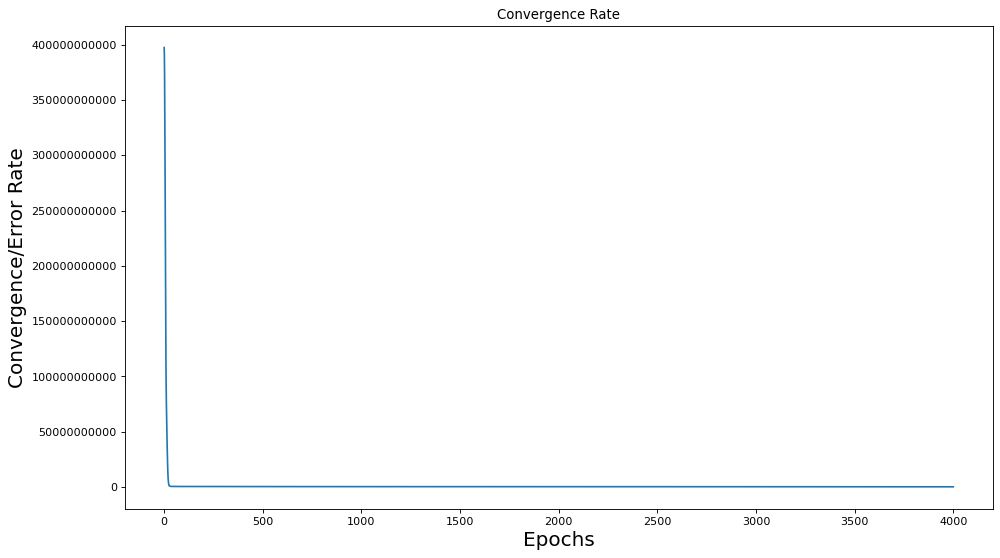

In [49]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.yaxis.offsetText.set_fontsize(16)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Convergence/Error Rate", fontsize=18)
plt.show()

### A Method to Generate Data for Future

In [50]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

#### Evaluating model on training data (whole data this time)

In [51]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

#### Generting Future Data and Predicting Future Cases

In [52]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

#### Evaluating metrics of trained ANN

In [53]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

22/22 [==============================] - 0s 2ms/step - loss: 236333328.0000 - mean_absolute_error: 9618.9961


[236333328.0, 9618.99609375]

#### Dataframe of predicted cases on future data by proposed ANN

In [54]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
10/02/22,1459856.750,30340.781250,1337071.750
11/02/22,1463366.500,30370.462891,1340635.500
12/02/22,1466859.500,30399.191406,1344193.250
13/02/22,1470349.500,30427.449219,1347749.250
14/02/22,1473837.500,30455.240234,1351303.125
15/02/22,1477322.500,30482.554688,1354854.750
16/02/22,1480805.375,30509.398438,1358404.500
17/02/22,1484285.250,30535.753906,1361952.250


### Plotting Graphs

In [55]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates, 
#          ann_future_model_prediction_on_training[:,0], '*b', 
#          ann_future_model_prediction_on_training[:,1], '*r', 
#          ann_future_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], fontsize=16)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

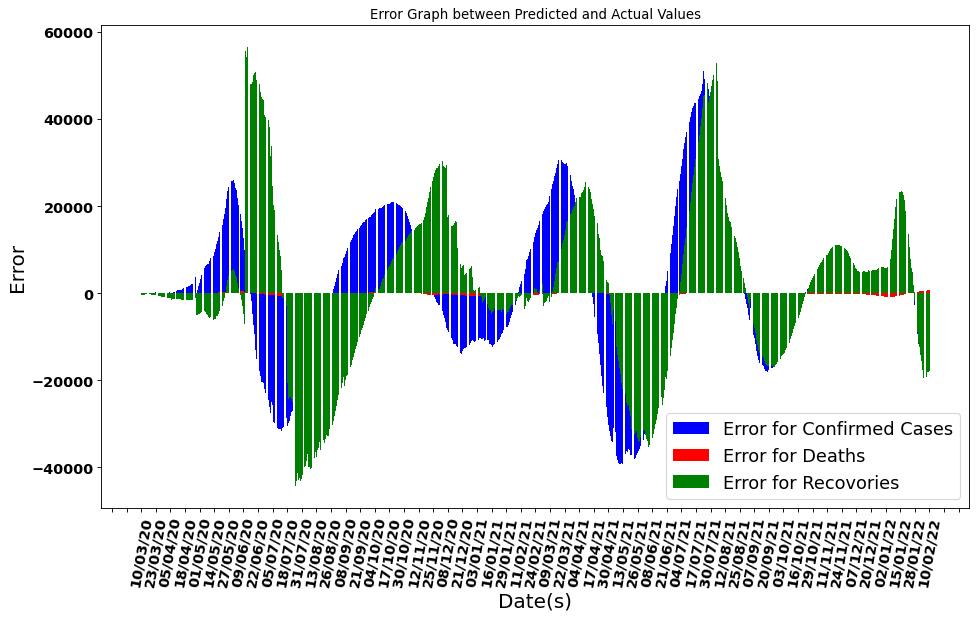

In [56]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.show()

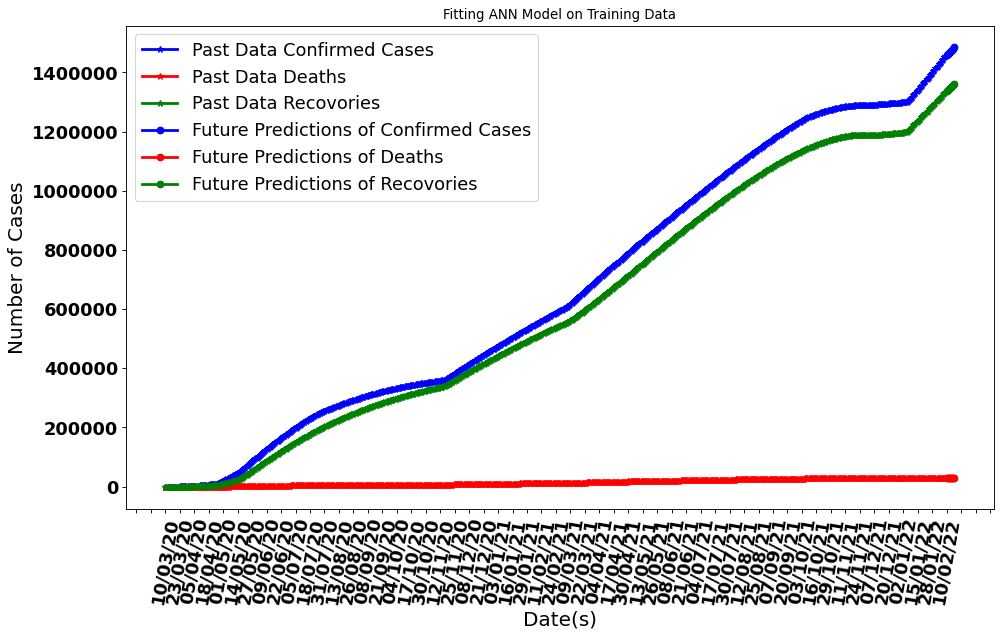

In [57]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()